# PRACTICA EVALUACIÓN FINAL - PARTE I #

Esta practica final tiene por objetivo evaluar los conocimientos que se han adquirido por parte del alumno a lo largo de los distintos temas del módulo. La práctica se divide en 2 partes: ésta primera parte que permite evaluar los temas de Data Understanding, Data Preparation, Regresión Lineal, Regresión Logística, Selección de variables, Análisis de componentes principales (PCA), Análisis Factorial y técnicas de clustering.

Supone por tanto un 75% de la calificación correspondiente a la Prática de Evaluación Final completa incluyendo ambas partes. Por tanto la parte 2, incluirá ejercicios de evaluación de los temas de series temporales y por ello supondrá un 25%.

En conjunto, toda la Práctica de Evaluación Final (ambas partes) tiene un peso del 60% de la nota final (el test de evaluación sería el 40% restante).

Es importante tener presente que, dado que se va a utilizar el mismo conjunto de datos para evaluar distintos temas del módulo, se perseguirán objetivos distintos en distintas partes de esta práctica parte I. Por ejemplo, para el modelo de regresión lineal, se tomará como variable objetivo ***Salary***, mientras que para la regresión logística, la variable objetivo será ***Gender***. Se deberá tener presente esto especialmente a la hora de llevar a cabo toda la fase de entendimiento y preparación de los datos ya que habrá transformaciones y analisis que serán comunes para ambos modelos y otras que serán específicas de cada modelo. en este sentido, el alumno deberá organizarse como mejor considere para llevar a cabo la práctica siguiendo el guión establecido pero con cierta flexibilidad para incluir todo aquello que considere oportuno en el momento que considere oportuno.

Por la misma razón, la parte de clustering no tiene variable objetivo como tal pero el analisis exploratorio y la preparación de los datos puede llevar a que haya particularidades para sus ejercicios además de las comunes.

Comenzando con esta primera parte de la práctica, en el primer bloque de código, conviene cargar las librerías que se van a utilizar a lo largo del notebook.

In [97]:
# importar librerias
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.metrics import mutual_info_score 
from scipy.stats import chi2_contingency 
from itertools import combinations 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.api import Logit
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.cluster import KMeans
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from scipy.stats import boxcox, shapiro, chi2_contingency
from sklearn.base import BaseEstimator, RegressorMixin 
from statsmodels.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report
) 
from sklearn.utils import resample
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from imblearn.over_sampling import SMOTE, SMOTENC
from factor_analyzer import calculate_kmo, calculate_bartlett_sphericity, FactorAnalyzer
import geopandas as gpd
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy import stats
from sklearn.model_selection import cross_val_score, KFold
#


En el siguiente paso vamos a proceder a cargar el fichero Salary_MD.csv que servirá como conjunto de datos para llevar a cabo toda la evaluación de esta parte I. Se trata de un fichero en el que cada registro es un empleado y sobre él, cada campo aporta información laboral y de formación.

In [98]:
# Cargar el fichero de datos en un DataFrame
data = pd.read_csv('Datos/Salary_MD.csv')

En los siguientes bloques de código el alumno debe programar las sentencias de código que considere oportunas para hacerse una idea general de los datos y de las variables. Visualización de datos, gráficos, etc. Los bloques son orientativos, el alumno puede añadir cuantos considere y codificarlos según su criterio.

In [99]:
# Mostrar los 10 primeros registros
data.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32,Male,1.0,Software Engineer,5.0,90000,UK,White,0
1,28,Female,2.0,Data Analyst,3.0,65000,USA,NaN,0
2,45,Male,3.0,Manager,15.0,150000,Canada,White,1
3,36,Female,1.0,Sales Associate,7.0,60000,USA,Hispanic,0
4,52,Male,2.0,Director,20.0,200000,USA,Asian,0
5,29,Male,1.0,Marketing Analyst,2.0,55000,USA,Hispanic,0
6,42,Female,2.0,Product Manager,12.0,120000,USA,Asian,0
7,31,Male,1.0,Sales Manager,4.0,80000,China,Korean,0
8,26,Female,1.0,Marketing Coordinator,1.0,45000,China,Chinese,0
9,38,Male,3.0,Scientist,10.0,110000,Australia,Australian,1


##### Análisis General

In [100]:
# Mostrar las columnas y tipos de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6684 non-null   int64  
 1   Gender               6613 non-null   object 
 2   Education Level      6661 non-null   float64
 3   Job Title            6644 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   int64  
 6   Country              6660 non-null   object 
 7   Race                 6521 non-null   object 
 8   Senior               6684 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 470.1+ KB


Tenemos un total de 9 variables y un volumen de 6.684 registros. En cuanto los tipos de datos, encontramos 5 variables numéricas (Age, Education level, Year of Experience, Salary, y Senior (variable booleana)) y 4 variables categóricas ( Gender, Job Title, Country y Race). 

Por otro lado, podemos osbervar hay cuatro variables que no presentan valores NaN (Age, Years of Experience, Salary y Senior), el resto de variables presentan algún y que otro valor NaN, pero representan un pequeño porcentaje de los datos, como veremos luego. 

##### Análisis variables numéricas

In [101]:
# Describir el DataFrame
data.describe()

,Age,Education Level,Years of Experience,Salary,Senior
count,6684.000000,6661.000000,6684.000000,6.684000e+03,6684.000000
mean,33.147816,1.623480,8.161655,1.164338e+05,0.143477
std,8.619754,0.880016,7.356860,6.738536e+04,0.350585
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,28.000000,1.000000,3.000000,7.000000e+04,0.000000
50%,32.000000,1.000000,7.000000,1.150000e+05,0.000000
75%,38.000000,2.000000,12.000000,1.600000e+05,0.000000
max,110.000000,3.000000,200.000000,2.159320e+06,1.000000


Variables numéricas:  ['Age' 'Education Level' 'Years of Experience' 'Salary' 'Senior']


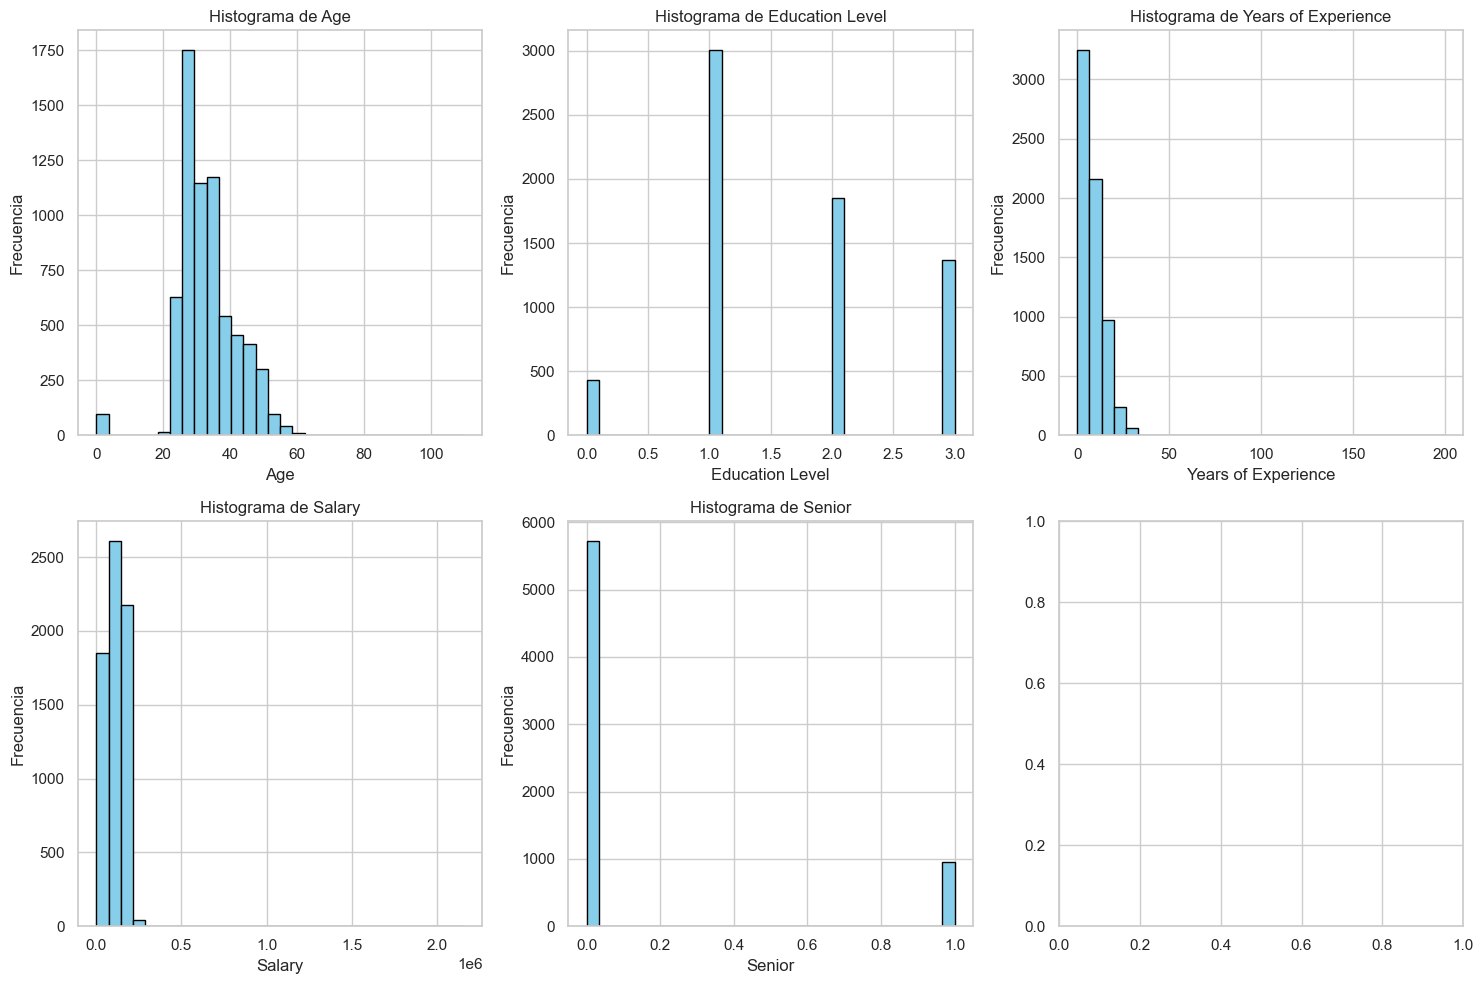

In [102]:
# Vamos a dibujar los histogramas de las variables numéricas
numeric_columns = data.select_dtypes(include=[np.number]).columns # Identificamos las variables numéricas 
print('Variables numéricas: ', numeric_columns.values)

# Crear una figura con subplots 
num_vars = len(numeric_columns)
fig, axes = plt.subplots(nrows= (num_vars // 3) +1, ncols = 3, figsize = (15, 5 * ((num_vars // 3) +1 )))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    # Grafica el histograma
    axes[i].hist(data[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


In [103]:
# Vamos a contabilizar los 0 ( que no NaN) por variable numérica
def count_zeros(df):
    zero_counts = df[numeric_columns].apply(lambda x: (x==0).sum()) 
    return zero_counts 

In [104]:
count_zeros(data)

Age                      94
Education Level         432
Years of Experience     162
Salary                   15
Senior                 5725
dtype: int64

##### Análisis variables categóricas

In [105]:
# Idenfiticar las variables categoricas
category_columns = data.select_dtypes(include=['object']).columns
print('Variables categógircas: ',category_columns.values)

# Calcular la cardinalidad de cada columna (las distintas categorias por variable)
cardinalities = data[category_columns].nunique() 
print('\n',cardinalities.sort_values(ascending=False)) 


Variables categógircas:  ['Gender' 'Job Title' 'Country' 'Race']

 Job Title    129
Race          10
Country        5
Gender         2
dtype: int64


In [106]:
# Identificar las variables categóricas con menos de 60 categorías
categorical_cols_reduced = cardinalities[cardinalities < 60].index # Filramos por aquellas cardinalities que son menores a 60
print('Variables categóricas con menos de 60: ', categorical_cols_reduced.values) 

for column in categorical_cols_reduced: # Aplicamos un bucle for para las variables categoricas reducidas. 
    print(f'Frecuencia de la columna {column}:') 
    print(data[column].value_counts()) # Aplicamos filtro [column] de las categoricas reducidas en data para luego caplicar un value.counts()

Variables categóricas con menos de 60:  ['Gender' 'Country' 'Race']
Frecuencia de la columna Gender:
Gender
Male      3649
Female    2964
Name: count, dtype: int64
Frecuencia de la columna Country:
Country
USA          1350
China        1339
Australia    1329
UK           1328
Canada       1314
Name: count, dtype: int64
Frecuencia de la columna Race:
Race
White               1902
Asian               1560
Korean               445
Australian           439
Chinese              435
Black                430
African American     345
Welsh                326
Mixed                325
Hispanic             314
Name: count, dtype: int64


### Pregunta 1 ###
De este primer vistazo general, ¿qué conclusiones sacamos acerca de las variables ***Salary*** y ***Years of Experience***? ¿Qué características tiene la variable ***Job Title***?

***Respuesta:***

En primer lugar, vamos a analizar las variables numéricas <b>*Salary*</b> y <b>*Years of Experience*</b>. Para ello, debemos analizarlas mediante la información general del dataset, los estadísticos descriptivos y los histogramas. 

En relación a la variable <b>*Salary*</b>, en primer lugar, observamos que no tiene valores nulos, pues tiene 6684 registros, esto nos indica que todas las personas que se han registrado en el dataset contienen la variable salario. 

En segundo lugar, debemos fijarnos en los estadisticos descriptivos. Lo primero que nos llama la atención es la elevada desviación estandard (67,385.36) y la presencia de un valor máximo muy elevado (2,159,320.00). Estos dos datos nos dan una pista sobre la presencia de outliers en relación a esta variable. Por otro lado, encontramos una media muy cercana a la mediana, lo que, si seguimos la teoría, debería ser una distribución simétrica pero, puesto que parece que tenemos presencia de outliers la distribución probablemente será asimétrica hacia la derecha. Finalmente, encontramos presencia de valores 0 que, al ser salario nos debería por lo menos llamar la atención, concretamente tiene 15 valores 0. 

Si osbervamos el histograma de <b>*Salary*</b>, podemos confirmar nuestras conclusiones iniciales. Existen outliers en la distribución, pues las distribuciones tiene una forma asimetrica positiva. 

En relación a la variable <b>*Years of Experience* </b> debemos seguir la misma metodología. En esta variable, al igual que la anterior, no existen valores nulos, por lo tanto, se ha registrado una edad para cada persona del dataset. 

En relación a los estadisticos descriptivos, sucede una situación parecida a la anterior, la mediana y la media tiene valores relativamente cercanos, por lo que, siguiendo la teoría, deberíamos afirmar que mantiene una distribución simétrica. Ahora bien, puesto que tiene un valor máximo muy elevado (200) y además improbable, nos sugiere que esta variable contiene outliers. Por lo que hace la desviación estandard (7.356860). Es bastante razonable, pues una variación de 7 años de experiencia laboral esta más que justificada. 

Para la variable categórica <b>*Job Tilte* </b>, la primera conclusión que extraemos es que probablemente deberemos eliminarla para simplificar nuestro modelo, pues contiene una alta cardinalidad (129 categorías únicas). De momento no la eliminaremos para ver si de alguna forma podemos agruparlas y reducir las categorías.

Pasamos ahora a profundizar aún más en las variables a través de las relaciones entre ellas. El alumno debe analizar correlaciones y las relaciones entre categóricas o categoricas y númericas.

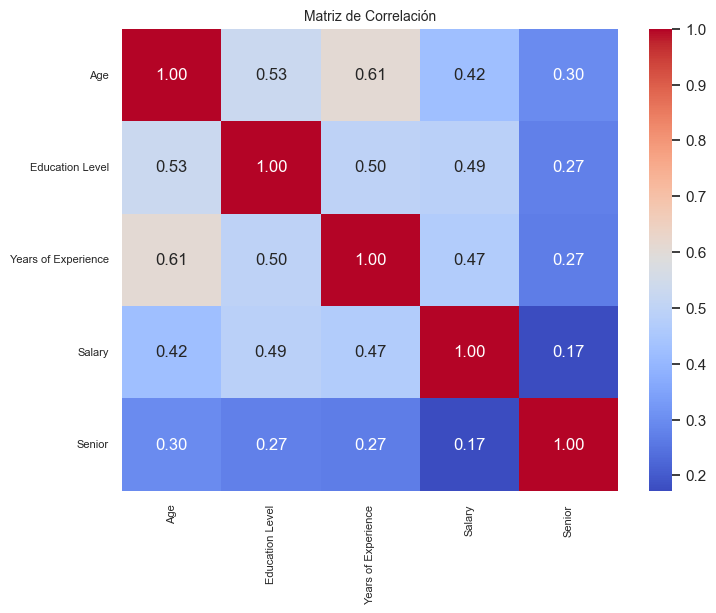

In [107]:
# Calcular la matriz de correlación
# Correlación entre variables numéricas
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(8,6))

# Dibujar la matriz de correlación como un heatmap
sns.heatmap(correlation_matrix, annot=True, fmt= '.2f', cmap='coolwarm', cbar=True)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title("Matriz de Correlación", fontsize=10)
plt.show()

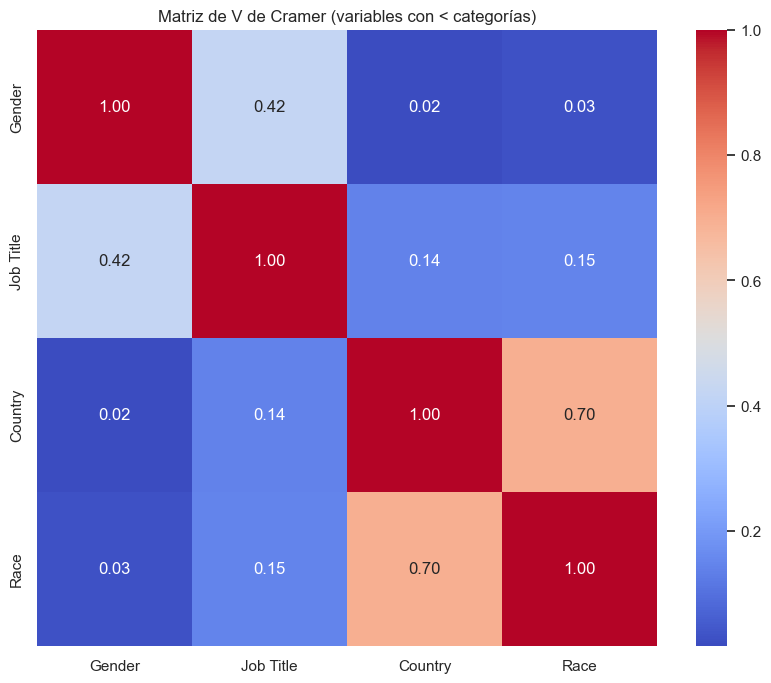

In [108]:
# Calcular la matriz de coeficientes V de Cramer
# Función para calcular V de Cramer
def cramers_v(confusion_matrix): 
    chi2, p, dof, expected =chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    k = min(confusion_matrix.shape)
    return np.sqrt(chi2 / (n *(k-1)))

# Crear una matriz vacía para almacenar los valores de V de Cramer
matrix = pd.DataFrame(index = category_columns, columns= category_columns)

# Cacular V de Cramer para cada par de variables categóricas
for var1, var2 in combinations(category_columns, 2):
    contingency_table = pd.crosstab(data[var1], data[var2])
    value = cramers_v(contingency_table)
    matrix.loc[var1, var2] = value
    matrix.loc[var2, var1] = value

# Llenar la diagonal con 1s
np.fill_diagonal(matrix.values,1)

# Convertir a tipo float
matrix = matrix.astype(float)

# Visualizar la matriz como heatmap 
plt.figure(figsize = (10,8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de V de Cramer (variables con < categorías)')
plt.show()

<b> V DE CRAMER: CANTIDAD DE INFORMACIÓN EXPLICADA POR LA DOS VARIABLES </b>
* <b> Si la relación es entre variable objetivo y otra variable, nos interesa, pues explica parte de la variable objetivo (podré predecir) </b>
* <b> Si hablamos de variables donde ninguna de ellas es la objetivo, tenemos un problema de multicolinealidad (aportan información redundante), hay que eliminar una de ellas </b>

El percentil 98 es: 200000.0


C:\Users\pauri\AppData\Local\Temp\ipykernel_23696\3847930591.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=target_var, data=filtered_data, order=ordered_categories, palette = 'coolwarm', ax =ax) # Creamos un boxplot para cada variable cat como x e price como y
C:\Users\pauri\AppData\Local\Temp\ipykernel_23696\3847930591.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=target_var, data=filtered_data, order=ordered_categories, palette = 'coolwarm', ax =ax) # Creamos un boxplot para cada variable cat como x e price como y
C:\Users\pauri\AppData\Local\Temp\ipykernel_23696\3847930591.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and

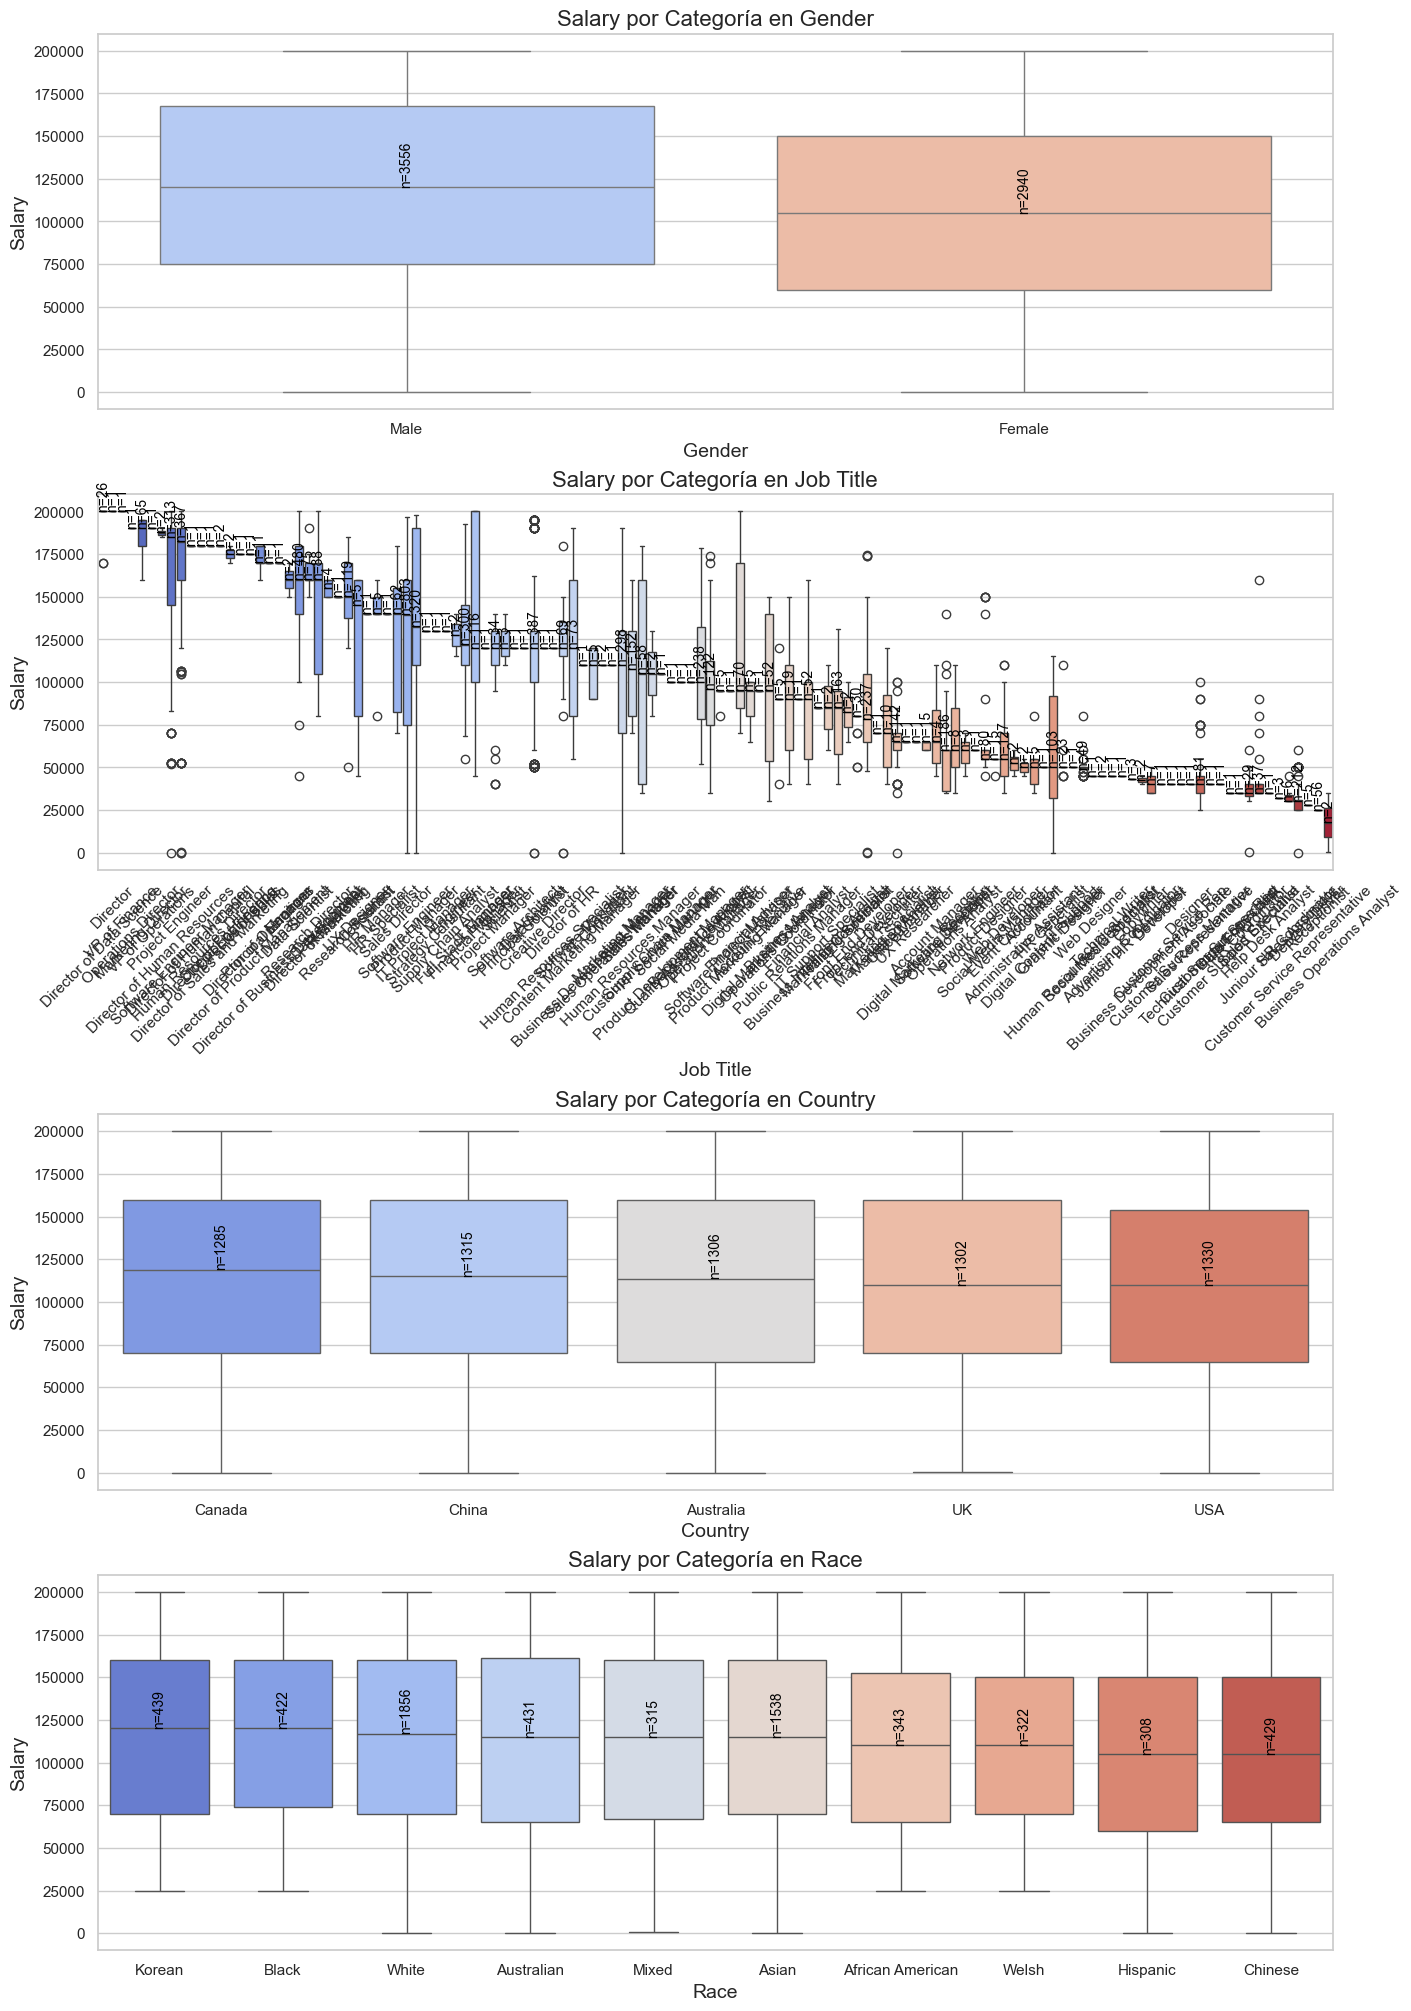

In [109]:
target_var = 'Salary'
percentil = 98

# Calcular el percentil 98 de la variable objetivo 
percent = np.percentile(data[target_var].dropna(), percentil)
print('El percentil 98 es:',percent)

# Filtrar los valores hasta el percentil 98 
filtered_data = data[data[target_var] <= percent]

# Crear el grid de subplots
n_cats = len(category_columns)
fig, axes = plt.subplots(n_cats,1,figsize=(14,5*n_cats),constrained_layout=True) #constrained_layout = True ajusta automaticamente el espaciado entre subplots para evitar que los elementos se sobrepongan

# Generar un boxplot por cada variable categórica
for ax, cat in zip(axes,category_columns): 
    # Ordenar las categorías según la mediana calculada
    medians = filtered_data.groupby(cat)[target_var].median().sort_values(ascending=False)  
    ordered_categories = medians.index

    # Generar el boxplot con las categorías ordenadas 
    sns.boxplot(x=cat, y=target_var, data=filtered_data, order=ordered_categories, palette = 'coolwarm', ax =ax) # Creamos un boxplot para cada variable cat como x e price como y
    ax.set_title(f'{target_var} por Categoría en {cat}', fontsize=16)
    ax.set_xlabel(cat, fontsize=14)
    ax.set_ylabel(target_var, fontsize=14)

    for i, category in enumerate(ordered_categories):
        # Filtrar los datos de la cateogría actual
        category_data = filtered_data[filtered_data[cat] == category][target_var]
        num_records = len(category_data)

        # Calcular la mediana de la categoría
        median_value = category_data.median()

        # Verficiar que la mediana es un valor finio y añadir la etiqueta
        if np.isfinite(median_value):
            # Colocar la etiqueta con el número de registros encima de la mediana
            ax.text(
                i, median_value, # i es la posición en el eje x
                f'n={num_records}',
                ha = 'center', va='bottom', fontsize=10, color='black', rotation=90 # Girar etiqueta 90 grados
            )
        
    # Condición para rotar etiquetas si hay más de 10 categorías
    num_categories = filtered_data[cat].nunique()
    if num_categories > 10:
        ax.tick_params(axis='x', labelrotation=45) # Rotar etiquetas en 45 grados
    else: 
        ax.tick_params(axis='x', labelrotation=0)


### Pregunta 2 ###
¿Cualés son las relaciones más destacadas entre variables? Describe estas relaciones e interpretalas brevemente.

***Respuesta:***

Para destacar aquellas relaciones entre variables numéricas más relevantes estableceremos el criterio en aquellas que tengan un coeficiente de correlación > 0.5. Por ello, destacamos tres relaciones relevantes. 

En primer lugar, destacamos la relación entre <b>YEARS_OF_EXPERIENCE</b> y <b>AGE</b> con un coeficiente de correlación de 0,61. Esta relación positiva resulta evidente, pues cuantos más años tiene una persona más posibilidades tiene de acumular años de experiencia laboral.

En segundo lugar destacamos la relación entre <b>EDUCATION LEVEL </b> y <b>AGE</b> con un 0,53. Esta correlación tan positiva tiene todo el sentido del mundo, pues a mas años de experiencia laboral más oportunidades de formación a tenido la persona, ya sea con grados, masters, tesis doctorales... 

Y, en tercer lugar, encontramos la relación existente entre <b>YEARS_OF_EXPERIENCE</b> y <b> EDUCATION LEVEL</b> con un 0,5. Nuevamente esta relación tiene todo el sentido del mundo, pues al ir aumentando los años de educación uno también puede ir aumentando los años de experiencia, pues depende todo del tiempo transcurrido.

Atendiendo a estas observaciones, podriamos afirmar que la variable <b>AGE</b> puede llegar a sobrar en nuestro modelo, pues esta mayormente explicada por varriables como </b>YEARS_OF_EXPERIENCE</b> y <b>EDUCATION_LEVEL</b>.

Para las variables categóricas el analisis cambia. Para tratar de destacar las variables con mayor relación, utilizaremos el umbral del > 0,4.

Mediante este criterio, destacamos en primer lugar la relación entre las variables categóricas <b>COUNTRY</b> y <b>RACE</b> con un 0,7. Esta relación resulta evidente, pues dependiendo del país se verá mas representado por una raza u otra. 

En segundo lugar, encontramos relación entre las variables <b>JOB_TITLE</b> y <b>GENDER</b>, un 0,42 de correlación. Esta relación puede tener sentido gracias al uso de generos en los titulos de los trabajos presentados. Puesto que, probablemente la variable <b>JOB_TITLE</b> quede eliminada de nuestro modelo, no le daremos demasiada importancia.

Nos centramos ahora en la calidad del dato. Arrancamos con el analisis de valores nulos donde el alumno debe programar código para determinar las variables que tienen valores nulos, el número de registros de cada variable con valores nulos, etc.

In [110]:
# Tabla de porcentaje de registros con Missing Values por cada variable
# Análisis de Missing Values
missing_data = data.isnull().sum() # Sumamos valores nulos
missing_data_percentage = (missing_data/len(data)) * 100

# Crear un dataframe con ambas columnas
missing_summary = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_data_percentage})

# Mostrar resultados
print('\nPorcentaj de valores faltantes por columnas:')
missing_summary.sort_values(by='Percentage', ascending = False)


Porcentaj de valores faltantes por columnas:


,Missing Values,Percentage
Race,163,2.438659
Gender,71,1.062238
Job Title,40,0.598444
Country,24,0.359066
Education Level,23,0.344105
Age,0,0.000000
Years of Experience,0,0.000000
Salary,0,0.000000
Senior,0,0.000000


In [111]:
# Cuenta de valores nulos por registro
null_fila = data.isnull().sum(axis=1) # suma valores nulos por fila existente en el dataframe
summary = null_fila.value_counts()
summary

0    6461
1     161
2      32
3      24
4       6
Name: count, dtype: int64

Text(0, 0.5, 'Valor de la variable Salary')

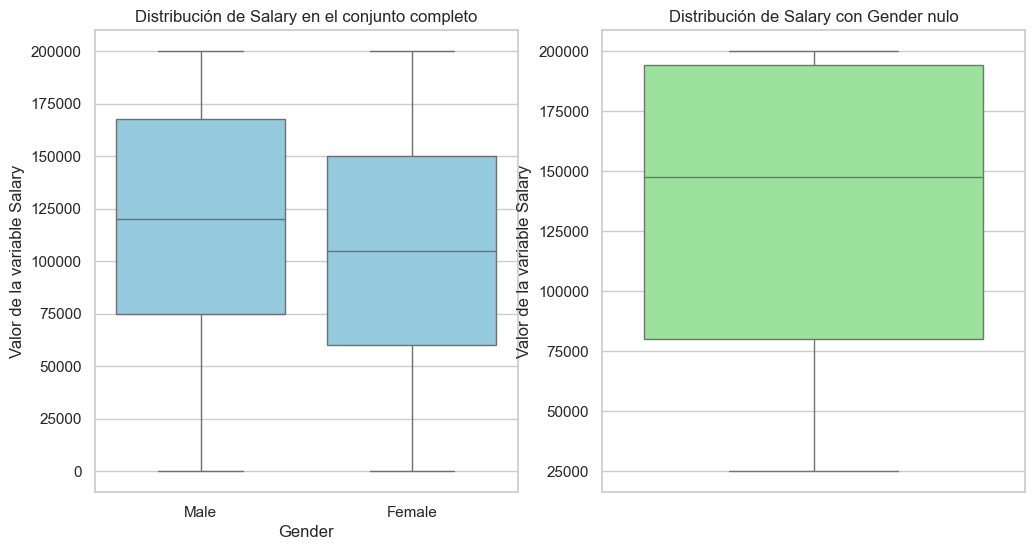

In [112]:
# Configuración para gráficos 
sns.set(style='whitegrid') # Estilo del gráfico

# Calcular el percentil de la variable objetivo 'Salary'
p = 98
percentile = np.percentile(data['Salary'].dropna(),p) # Aplicamos eprcentil para eliminar los posibles outliers

# Filtrar los datos: registros donde 'Salary' <= percentil
df_percentile = data[data['Salary'] <= percentile]

# Filtrar datos donde 'Gender' es nulo y 'Salary' <= percentil

df_null_X = df_percentile[df_percentile['Gender'].isnull()]

# Crear los box plots
fig,axes = plt.subplots(1,2, figsize=(12,6)) 

# PRMER BOXPLOT: Todo el conjunto de datos
sns.boxplot(x='Gender',y='Salary', data=df_percentile, color='skyblue', ax=axes[0])
axes[0].set_title(f'Distribución de Salary en el conjunto completo')
axes[0].set_ylabel('Valor de la variable Salary')

# SEGUNDO BOXPLOT: Registros donde condition es nulo

sns.boxplot(y='Salary', data=df_null_X, color='lightgreen', ax=axes[1])
axes[1].set_title(f'Distribución de Salary con Gender nulo')
axes[1].set_ylabel('Valor de la variable Salary')


### Pregunta 3 ###
¿Éxiste algún tipo de relación entre los valores nulos de la variable ***Gender*** y ***Salary***? Los nulos de ***Gender***, para esta práctica, hay que llevar a cabo algún tipo de imputación para no perder esos registros. ¿Cómo se realizará está imputación y cuales son las razones que llevan a hacerlo así?

***Respuesta:***

Para poder responder la pregunta debemos fijarnos en los boxplots ilustrados.

El primero de ellos muestra la distribución de Salary con percentil 98 (para eliminar los outliers) por cada uno de los generos existentes para el total de los datos disponibles. El segundo de ellos muestra la distribución de salary para aquellas filas donde Gender es nulo. 

Como podemos osbervar, la distribución en los <b>Salary</b> de la categoría <b>Male</b> tiene una moda de 120.000 aproximadamente. El percentil 75 es de 170.000 aproximadamente, y el perceintl 25 es de 75.000. Los máximos y los mínimos son de 200.000 y 0 respectivamente.

Como podemos osbervar, la distribución en los <b>Salary</b> de la categoría <b>Female</b> tiene una moda de 105.000 aproximadamente. El percentil 75 es de 150.000, y el perceintl 25 es de 60.000 aproximadamente. Los máximos y los mínimos son de 200.000 y 0 respectivamente.

Por lo que respecta a la distribución de <b>Salary</b> en el conjunto de datos donde <b>Gender</b> es nulo, tiene una mode de 148.000 aproximadamente. El precentil 75 es de 190.000 aproximadamente y el percentil 35 es de 77.000.El máximo es de 200.000 y el mínimo es de 25.000. Por ello, podemos ver como la muestra de valores gender null exlica bastantes datos del conjunto entero de las distribuciones del <b>Salary</b> por <b>gender</b>, por ello, podremos imputar los valroes null de <b>gender</b>.

La imputación, por lo tanto, la realizaremos utilizando la moda de <b>Salary Male</b>. Con ello imputaremos como Female aquellos valores que tengan un salario menor a 120.000 y como male aquellos valores que tengan un salario mayor a 120.000. Con ello, conseguiremos incluir valores relativamente altos como female y valores relativamente bajos como male y, así, aplicar una categorización mas o menos equitativa de los datos <b>gender=null</b>.

Antes de pasar a ejecutar las acciones que hayamos decidido realizar para corregir los problemas de valores nulos, analizamos los valores atípicos de las variables. Utilizaremos 2 métodos para identificarlos: Z-Score y rango intercuartil (IQR)

Umbral inferior: 7.290488287188946
Umbral superior: 59.005143071279036


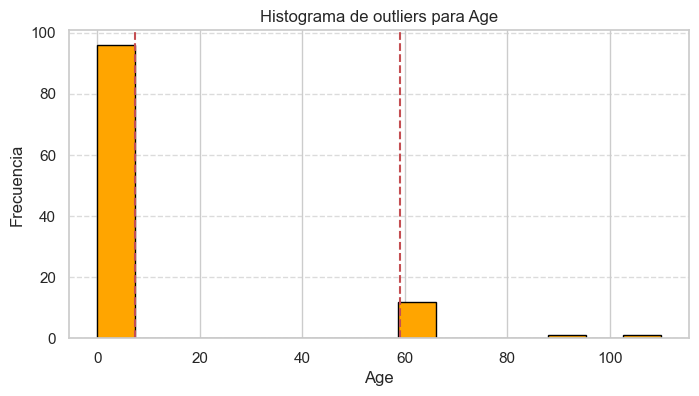

Umbral inferior: -1.0163688868202645
Umbral superior: 4.263328802748804


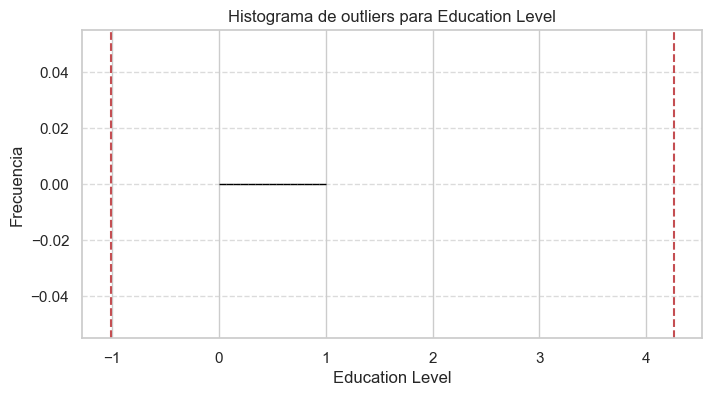

Umbral inferior: -13.907273416298878
Umbral superior: 30.23058281187039


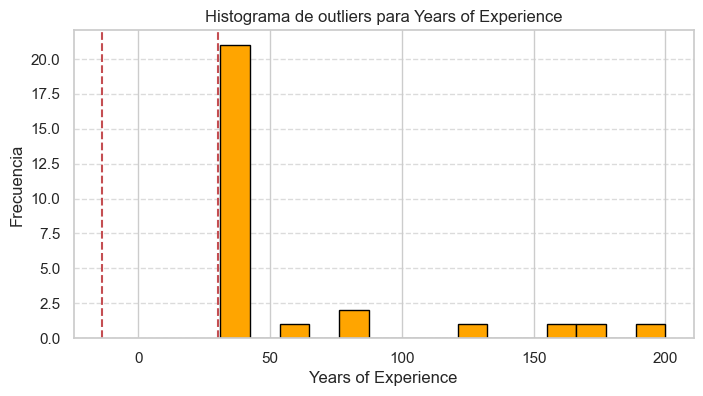

Umbral inferior: -85707.11109768035
Umbral superior: 318574.7735752387


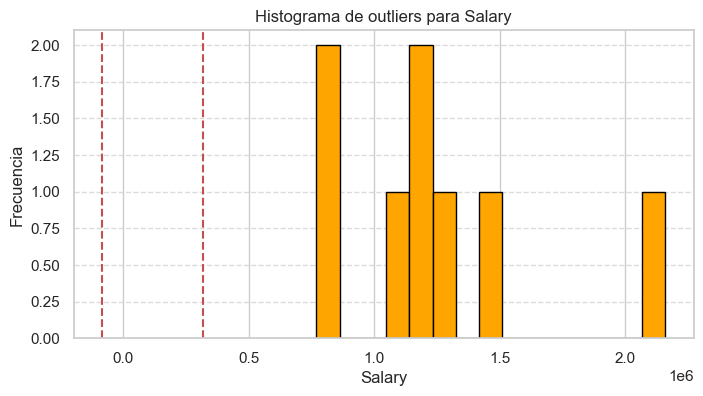

Umbral inferior: -0.9081987966519016
Umbral superior: 1.1951527164603994


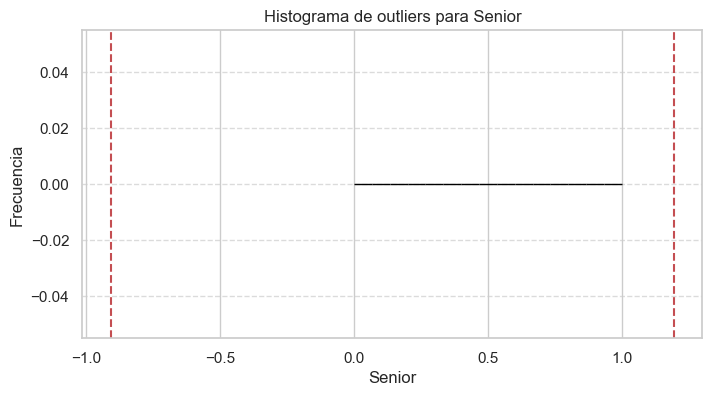


Outliers identificados:
              Variable Outliers
0                  Age      110
1  Years of Experience       28
2               Salary        8


In [113]:
# Identificación de outliers (Z-score)
outliers = pd.DataFrame(columns=['Variable','Outliers']) # Creamos un Data Frame con dos columnas

for i, column in enumerate(numeric_columns):
    z_scores = np.abs(stats.zscore(data[column], nan_policy='omit')) # Calcula el Z-Score para cada valor de la columna df[column], np,abs toma el valor absoluto, nan_policy= 'omit ignorla los NaN
    outliers_indices = np.where(z_scores > 3)[0] # Filtra los valores cuyo Z-Score es mayor a 3 (típicamente considerados outliers)

    # Calculamos la media y la desviación estandar
    mu = np.mean(data[column])
    sigma = np.std(data[column])

    # Calculamos los valores correspondientes a un Z-Score de 3 y -3
    upper_bound = 3 * sigma + mu
    lower_bound = - 3 * sigma + mu
    print(f'Umbral inferior: {lower_bound}')
    print(f'Umbral superior: {upper_bound}')

    if len(outliers_indices) > 0:
        outliers = pd.concat([outliers,pd.DataFrame([{'Variable': column, 'Outliers': len( outliers_indices)}])], ignore_index=True)

    # Pintar histograma de los valores outliers
    plt.figure(figsize=(8, 4))
    plt.hist(data[column].iloc[outliers_indices], bins=15, color='orange', edgecolor='black')
    plt.title(f'Histograma de outliers para {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.axvline(lower_bound, color='r', linestyle='--', label='Límite Inferior')
    plt.axvline(upper_bound, color='r', linestyle='--', label='Límite Superior')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


print('\nOutliers identificados:')
print(outliers)

Q1 (25 percentil): 28.0
Q3 (75 percentil): 38.0
Rango IQR: 10.0
Umbral inferior: 13.0
Umbral superior: 53.0


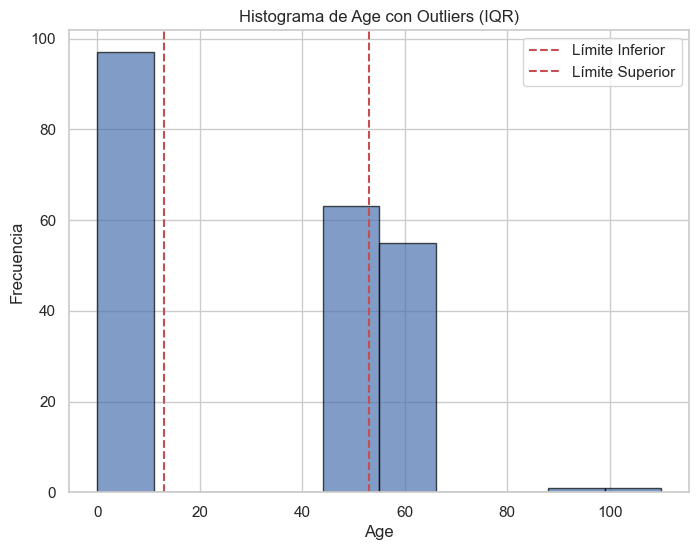

Q1 (25 percentil): 3.0
Q3 (75 percentil): 12.0
Rango IQR: 9.0
Umbral inferior: -10.5
Umbral superior: 25.5


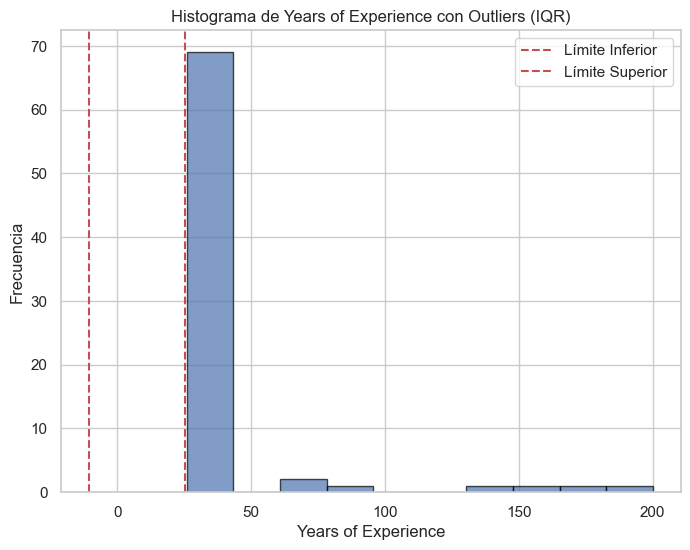

Q1 (25 percentil): 70000.0
Q3 (75 percentil): 160000.0
Rango IQR: 90000.0
Umbral inferior: -65000.0
Umbral superior: 295000.0


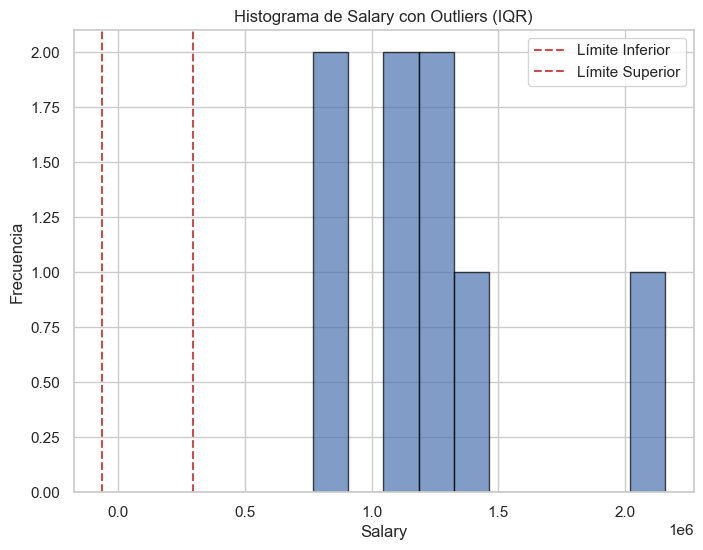

Q1 (25 percentil): 0.0
Q3 (75 percentil): 0.0
Rango IQR: 0.0
Umbral inferior: 0.0
Umbral superior: 0.0


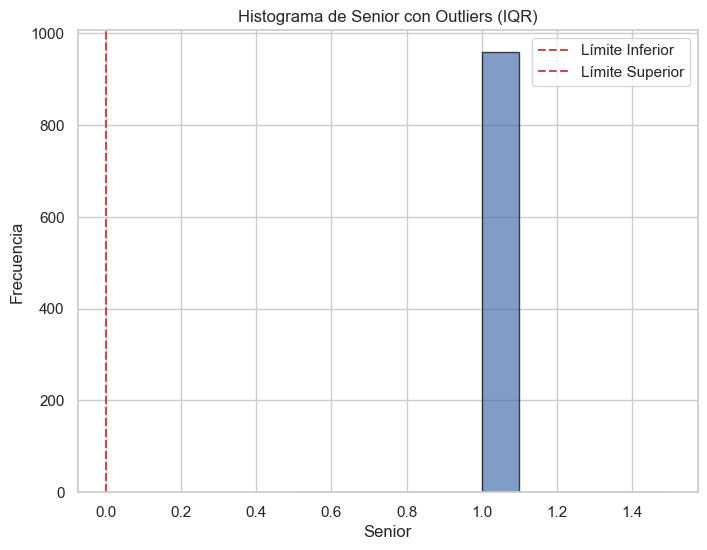


Outliers identificados mediante IQR:
              Variable Outliers
0                  Age      217
1  Years of Experience       76
2               Salary        8
3               Senior      959


In [114]:
# Identificación de outliers (IQR)
outliers = pd.DataFrame(columns=['Variable','Outliers'])
for i, column in enumerate(numeric_columns):
    df_col_dropna = data[column].dropna()
    Q1 = df_col_dropna.quantile(0.25) # Primer quartil
    Q3 = df_col_dropna.quantile(0.75) # Tercer quartil
    IQR = Q3 - Q1 # Rango intercuartilico 

    # Límiters para outliers 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar los outliers
    outliers_values = df_col_dropna[(df_col_dropna < lower_bound) | (df_col_dropna > upper_bound)]
    if len(outliers_values) > 0:
        outliers = pd.concat([outliers,pd.DataFrame([{'Variable': column, 'Outliers': len( outliers_values)}])], ignore_index=True)
 
        print(f"Q1 (25 percentil): {Q1}")    
        print(f"Q3 (75 percentil): {Q3}")
        print(f"Rango IQR: {IQR}")
        print(f"Umbral inferior: {lower_bound}")
        print(f"Umbral superior: {upper_bound}")

        # Graficar los histogramas de los outliers
        plt.figure(figsize=(8, 6))
        plt.hist(outliers_values, bins=10, edgecolor='black', alpha=0.7)
        plt.axvline(lower_bound, color='r', linestyle='--', label='Límite Inferior')
        plt.axvline(upper_bound, color='r', linestyle='--', label='Límite Superior')
        plt.title(f"Histograma de {column} con Outliers (IQR)")
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        plt.legend()
        plt.show()
    

# Mostrar los resultados de los outliers
print("\nOutliers identificados mediante IQR:")
print(outliers)

### Pregunta 4 ###
¿Qué variables tienen outliers? en ocasiones, dependiendo de los outliers de una variable, es más apropiado identificarlos mediante un método u otro. En tu opinión y en base al estudio de los outliers de cada variable numérica, ¿cuál es el más apropiado para cada una y por qué?

***Respuesta:***

Observado los dos metodos existentes podemos llegar a unas conclusiones u otras.

Mediante el primer modelo, podemos encontrar tres variables con presencia de outliers. <b>YEARS_OF_EXPERIENCE</b> con 28 outliers, <b>AGE</b> con 110 outleirs y <b>SALARY</b> con 8 outliers. Si analizamos los umbrales de cada una de las variables podemos llegar a las siguientes conclusiones. Utilizando el segundo modelo encontramos cuatro variables con presencia de outleirs <b>YEARS_OF_EXPERIENCE</b> con 76 outliers, <b>AGE</b> con 217 outleir,  <b>SALARY</b> con 8 outliers, y <b>SENIOR</b> con 959 outliers. Puesto que la variable <b>SENIOR</b> es de 0 o 1, no la analizaremos en este caso pues es imposible que exista presencia de outilers.

En primer lugar, para la variable <b>AGE</b> observamos unos umbrales de 7.29 para el umbral inferior y 59,0 para el umbral superior. Si bien es cierto que nos estamos comiendo 5 años en edad de trabajar (pues 64 años son los años de jubilación), en el modelo de IQR para la variable <b>AGE</b> estamos estableciendo como 28 años el umbral inferior y 38 el umbral superior. Para mejorar los datos, podremos modificar el criterio z-score a -2 y 2 (incluso -3 o -4 y 2) para abarcar más datos. 

En segundo lugar, para la variable <b>YEARS_OF_EXPERIENCE</b> el criterio más adecuado es el IQR, pues el umbral inferior es de 3.0 y el umbral superior de 12.0, lo que queda, sin duda, mucho más acertado que el criterio z-score donde el umbral inferior es de -13.91 y el superior de 30.23. Podriamos modificar las métricas IQR para abarcar más rango nuevamente, (por ejemplo -2,5 y 2,5).

En tercer lugar encontramos la variable <b>SALARY</b>. Para esta es mejor utilizar el criterio IQR, pues los umbrales son de -65000.0 el umbtarl inferior y de 295000.0 el umbral superior, mientras que utilzando el criterio z-score el umbral inferior es de -85707.11 y el superior de 318574.77. Puesto que no tenemos valores negativos como salario en nuestro data set, al aplicar dicho filtro pillariamos datos hasta 295.000€ de salario.


Ahora procedemos a trabajar los datos seleccionando registros, variables y solventando los problemas de outliers y valores nulos para dejar preparado el conjunto de datos para la fase de modelado posterior. En este sentido, las siguientes líneas de código, deben programarse para realizar estas transformaciones.

In [115]:
# Seleccion/Eliminación de registros y variables
# Vamos a eliminar las variables AGE y JOB_TITLE, pues consideramos que, la primera esta directamente correlacionada con years_of_exoerience y education_level y la segunda tiene un numero muy elevado de categorias. Además, eliminaremos la variable Race, pues es una variable directamente correlacionada con el país
data  = data.drop(columns=['Age','Job Title','Race'])
data.head()

,Gender,Education Level,Years of Experience,Salary,Country,Senior
0,Male,1.0,5.0,90000,UK,0
1,Female,2.0,3.0,65000,USA,0
2,Male,3.0,15.0,150000,Canada,1
3,Female,1.0,7.0,60000,USA,0
4,Male,2.0,20.0,200000,USA,0


In [116]:
# Imputación o acciones para tratar valores nulos, para tratar los valores nulos, hemos decido en primer lugar categorizar los valores de la variable gender y eliminar el resto de valores nulos, pues no encontramos demasiados en comparación al dataset
# Em primer lugar, eliminamos las variables con 2 o más valores nulos 
data.dropna(thresh=data.shape[1] - 1, inplace=True)

In [117]:
# Vemos cuantos valores nulos hay por variable
data.isnull().sum()

Gender                 50
Education Level         0
Years of Experience     0
Salary                  0
Country                 7
Senior                  0
dtype: int64

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6655 entries, 0 to 6683
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               6605 non-null   object 
 1   Education Level      6655 non-null   float64
 2   Years of Experience  6655 non-null   float64
 3   Salary               6655 non-null   int64  
 4   Country              6648 non-null   object 
 5   Senior               6655 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 363.9+ KB


In [119]:
# Ahora vamos a categorizar esos 40 valores nulos de gender, para ello determinaremos que es "Male" si tiene un "Salary" superio o igual a 120.000 y "Female" si el "Salary" es inferior a 120.000

# Criterio de imputación para los valores nulos en 'Gender'
data.loc[data['Gender'].isnull() & (data['Salary'] >= 120000), 'Gender'] = 'Male'
data.loc[data['Gender'].isnull() & (data['Salary'] < 120000), 'Gender'] = 'Female'

# Comprobación rápida
print("Valores nulos en Gender después de la imputación:", data['Gender'].isnull().sum())

Valores nulos en Gender después de la imputación: 0


In [120]:
data.isnull().sum()

Gender                 0
Education Level        0
Years of Experience    0
Salary                 0
Country                7
Senior                 0
dtype: int64

In [121]:
# Ahora procedemos a eliminar los valores nulos de "Country",
data.dropna(inplace=True)

In [122]:
data.isnull().sum()

Gender                 0
Education Level        0
Years of Experience    0
Salary                 0
Country                0
Senior                 0
dtype: int64

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6648 entries, 0 to 6683
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               6648 non-null   object 
 1   Education Level      6648 non-null   float64
 2   Years of Experience  6648 non-null   float64
 3   Salary               6648 non-null   int64  
 4   Country              6648 non-null   object 
 5   Senior               6648 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 363.6+ KB


In [124]:
# Imputación o transformación de valores atípicos, vamos a usar cada criterio para aquellas variables que presentan outliers. En este caso, como hemos eliminado la variable AGE (Devido a su correlación) debemos tratar los outleirs para la variable years_of_experience y salary

# YEARS_OF_EXPERIENCE. Como hemos comentado, vamos a modificar los límites para abarcar más años de experiencia
# Identificación de outliers (IQR)
Q1_Y_Exp = data['Years of Experience'].quantile(0.25) # Primer quartil YEARS_OF_EXPERIENCE
Q3_Y_Exp = data['Years of Experience'].quantile(0.75) # Tercer quartil YEARS_OF_EXPERIENCE
IQR_Y_Exp = Q3_Y_Exp - Q1_Y_Exp # Rango intercuartilico YEARS_OF_EXPERIENCE

lower_limit_Y_Exp = Q1_Y_Exp - 2.5 * IQR_Y_Exp
upper_limit_Y_Exp = Q1_Y_Exp + 2.5 * IQR_Y_Exp # Ahora si estamos cogiendo un margen mas elevado

# SALARY
Q1_Salary = data['Salary'].quantile(0.25) # Primer quartil Salary
Q3_Salary = data['Salary'].quantile(0.75) # Tercer quartil Salary
IQR_Salary = Q3_Salary - Q1_Salary # Rango intercuartilico Salary

lower_limit_Salary = Q1_Salary - 2.5 * IQR_Salary
upper_limit_Salary = Q1_Salary + 2.5 * IQR_Salary

 # Filtrar los registros que están dentro de los límites ara ambas variables
data = data[(data['Years of Experience'] >=lower_limit_Y_Exp) & (data['Years of Experience'] <= upper_limit_Y_Exp) & (data['Salary'] >= lower_limit_Salary) & (data['Salary']<= upper_limit_Salary)]

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6564 entries, 0 to 6683
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               6564 non-null   object 
 1   Education Level      6564 non-null   float64
 2   Years of Experience  6564 non-null   float64
 3   Salary               6564 non-null   int64  
 4   Country              6564 non-null   object 
 5   Senior               6564 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 359.0+ KB


In [126]:
lower_limit_Salary 

np.float64(-155000.0)

In [127]:
upper_limit_Salary

np.float64(295000.0)

In [128]:
data.head()

,Gender,Education Level,Years of Experience,Salary,Country,Senior
0,Male,1.0,5.0,90000,UK,0
1,Female,2.0,3.0,65000,USA,0
2,Male,3.0,15.0,150000,Canada,1
3,Female,1.0,7.0,60000,USA,0
4,Male,2.0,20.0,200000,USA,0


In [129]:
# Por otro lado, vamos a eliminar la variable Country por complicación del modelo
data.drop(columns='Country',inplace=True)

In [130]:
data.head()

,Gender,Education Level,Years of Experience,Salary,Senior
0,Male,1.0,5.0,90000,0
1,Female,2.0,3.0,65000,0
2,Male,3.0,15.0,150000,1
3,Female,1.0,7.0,60000,0
4,Male,2.0,20.0,200000,0


### Pregunta 5 ###
¿cómo han sido tratados los valores átipicos de la variable ***Salary*** y por qué se ha tomado esta decisión?

***Respuesta:***

Los valores atipicos de <b> Salary</b>, como se ha mencionado anteriormente, se han trataro mediante el criterio de tratamiento de outliers de IQR. Para ello se han eliminado aquellos valores superiores a 295.000€ y aquellos inferiores a -155.000€. Puesto que en la variable <b>Salary</b> no hay valores menores que 0, solo se han eliminado aquellos valores superiores a 295.000€.

Se ha tomado esta decision pork el crtierio IQR era bastante más acertado que el z-score, como se explica anteriormente.

A continuación en los siguientes bloques de código, se han de llevar a cabo ciertas transformaciones que conviene realizar sobre los datos para dejarlos depurados y preparados para la fase de modelado. En este sentido, transformaciones de variables númericas para buscar mayor relación con la variable objetivo, recategorización de variables categóricas, estandarización, homogeneización de formatos y unidades, etc.

In [131]:
# Codificación...
data = pd.get_dummies(data, columns=['Gender'], drop_first=True).astype(int)

In [132]:
data.head()

,Education Level,Years of Experience,Salary,Senior,Gender_Male
0,1,5,90000,0,1
1,2,3,65000,0,0
2,3,15,150000,1,1
3,1,7,60000,0,0
4,2,20,200000,0,1


In [133]:
# Estandarización...
cols_a_escalar = ['Salary', 'Years of Experience' , 'Education Level']

scaler = StandardScaler()

# Escalar solo esas columnas
data[cols_a_escalar] = scaler.fit_transform(data[cols_a_escalar])

In [134]:
data.head()

,Education Level,Years of Experience,Salary,Senior,Gender_Male
0,-0.700650,-0.501586,-0.466600,0,1
1,0.439143,-0.854792,-0.941664,0,0
2,1.578936,1.264444,0.673552,1,1
3,-0.700650,-0.148380,-1.036676,0,0
4,0.439143,2.147459,1.623679,0,1


In [135]:
# Tipos de valores...
print(data.dtypes)


Education Level        float64
Years of Experience    float64
Salary                 float64
Senior                   int64
Gender_Male              int64
dtype: object


In [136]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6564 entries, 0 to 6683
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education Level      6564 non-null   float64
 1   Years of Experience  6564 non-null   float64
 2   Salary               6564 non-null   float64
 3   Senior               6564 non-null   int64  
 4   Gender_Male          6564 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 307.7 KB
None


In [137]:
# Vamos a balancear los datos de Seior y aplicar nuevamente el modelo

print(data['Senior'].value_counts())
print(data['Senior'].value_counts(normalize=True))

Senior
0    5635
1     929
Name: count, dtype: int64
Senior
0    0.85847
1    0.14153
Name: proportion, dtype: float64


In [138]:
# Separar clases
senior = data[data['Senior'] == 1]
non_senior = data[data['Senior'] == 0]

# Submuestrear no-Senior para igualar tamaño
non_senior_downsampled = resample(
    non_senior,
    replace=False,
    n_samples=len(senior),
    random_state=42
)

# Combinar ambas clases balanceadas
data_balanced = pd.concat([senior, non_senior_downsampled])

In [139]:
print(data_balanced['Senior'].value_counts())
print(data_balanced['Senior'].value_counts(normalize=True))

Senior
1    929
0    929
Name: count, dtype: int64
Senior
1    0.5
0    0.5
Name: proportion, dtype: float64


### Pregunta 6 ###
En caso de que se haya llevado a cabo algún tratamiento sobre las variables categóricas, ¿qué acciones se han tomado y sobre qué variables? En el caso de la variable ***Education Level***, ¿Se ha llevado a cabo sobre ella alguna transformación o se ha dejado tal cual?¿Por qué?

***Respuesta:***

Sobre las variables categóricas hemos aplicado una categorización de la variable Gender mediante el metodo get.dummies() otorgandole 1 si es Male y 0 si es Female. Respecto a la variable <b>Education_level</b> no hemos realizado ninguna transformación pues los datos vienen dados numéricamente.

Procedemos ahora con el primer modelo que vamos a definir con este conjunto de datos. Se trata de un modelo de regresión lineal que tratará de predecir los valores de la variable ***Salary*** en función de las demás variables.

Hasta aquí se habrán realizado diversas transformaciones y preparaciones de los datos comunes para todos los ejercicios de esta práctica. En los siguientes bloques, añadir transformaciones específicas para este modelo de regresión lineal.

In [140]:
# Transformaciones varias para adaptar al modelo de regresión lineal
boolean_columns = data.select_dtypes(include='bool').columns
data_balanced[boolean_columns] = data_balanced[boolean_columns].astype(int)

# Asegurar que los datos son numéricos
data_balanced = data_balanced.apply(pd.to_numeric, errors = 'coerce')

Ahora procedemos a realizar la separación del conjunto de datos en 2 conjuntos: uno con las variables predictoras y otro con la variable objetivo. También separamos en conjuntos de entrenamiento y test para poder llevar a cabo el entrenamiento del modelo y la validación en conjuntos distintos. Escoged el porcentaje de datos para entrenamiento que se considere adecuado. Por último, entrenar un modelo de regresión lineal mostrando un resumen de los parametros, coeficientes y demás información útil para valorar la bondad del modelo entrenado.

In [141]:
# Definir la variable objetivo (y) y las predictoras (X)
y = data_balanced['Salary']
X = data_balanced.drop(['Salary'],axis=1)

In [142]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
# Crear y ajustar el modelo
X_train = sm.add_constant(X_train) # Agrega una constant (columna de 1) al conjunto de entrenamiento X_train (beta 0), es necesario, pues la libreria statsmodels no incluye la constante en el modelo

# Crear y ajustar el modelo
model = sm.OLS(y_train, X_train).fit() # Aplicamos el modelo de minimos cuadrados ordinarios al conjunto de entrenamiento

# Extraer coeficientes 
coef = model.params

In [144]:
# Mostrar el resumen detallado del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1051.
Date:                Tue, 15 Jul 2025   Prob (F-statistic):               0.00
Time:                        17:19:29   Log-Likelihood:                -990.60
No. Observations:                1486   AIC:                             1991.
Df Residuals:                    1481   BIC:                             2018.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0399    

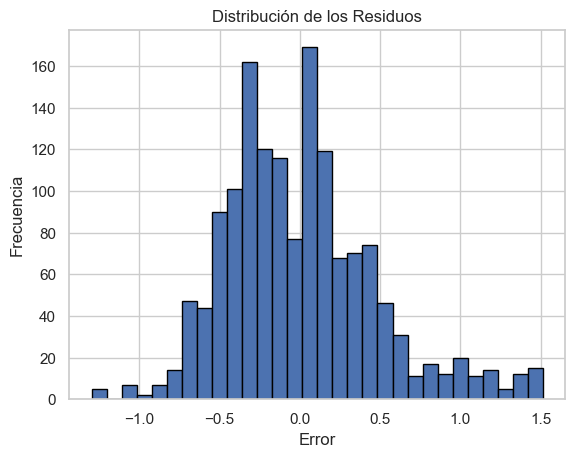

In [145]:
plt.hist(model.resid, bins=30,edgecolor='black') # edgecolor sirve para separar columnas
plt.title('Distribución de los Residuos')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()

### Pregunta 7 ###
A la vista de los resultados del modelo, ¿Presenta sesgo el modelo? ¿Se cumplen las condiciones/supuestos que deben cumplirse en una regresión lineal para que el modelo sea estadisticamente válido? Detalla la respuesta haciendo interpretacion de los resultados obtenidos.

***Respuesta:***

Echandole un ojo al resumen del modelo podemos ver que las variables incluidas en el modelo explican en un 73,9% la variabilidad de la variable Salary en el modelo (R^2). Por otr lado, el termino constante (intercepto) tiene un coeficiente negativo y significativo (p=0.002), pero esto no implica sesgo per se, simplemente significa que cuando todas las variables independientes son cero, el salario estimado sería negativo. Esto puede no tener sentido práctico, pero no necesaramente es una señal de sesgo si el modelo no se usa fuera del rango observado. A parte el modelo es estadisticamente significativo 

Vamos a evaluar cada uno de los supuestos de la regresión lineal:

* Linealdiad: los altos niveles t y significancia (p < 0.0001 en todas las variables) sugiere que hay una relación lineal fuerte.

* Independencia de errores: El estadístico Durbin-Watson = 1.981, lo cual está muy cerca de 2, indicando que no hay autocorrelación significativa de los errores.

* Normalidad de los errores: El Jarque - Bera  177.894 y Omnibus 133.113 indican que los residuos no siguen una distribución normal. No implica un problema pues suele ser normal con grandes muestras.

* Homoscedasticidad: No se puede confiramr. pues deberia,os calcular el Bresuch-Pagan.

* Ausencia de multicolinealidad: El Cond. No. (número de condición) =  4.27 es bajo. Valores altos (>30) indican multicolinealidad


Interpretación de los coeficientes:

Todos los coeficientes son estadísticamente significativos (p < 0.0001):

* Education level (0.2828): Por cada unidad adicional en el nivel educativo, el salario aumenta en promedio 0.2828 unidades, manteniendo el resto constante.

* Years of Experience (0.6094): Es la variable más influyente. Cada año extra de experiencia incrementa el salario en 0.6094 unidades, en promedio.

* Senior (-0.1918): Ser “Senior” reduce el salario en 0.1918 unidades. Puesto que hemos balanceado los datos en Senior, deberemos echarle un vistazo a el por que la variable Senior tiene relacion lineal negativa.

* Gender Male (0.1546):  Los hombres ganan en promedio 0.1546 unidades más que las mujeres, controlando por las otras variables. Puede señalar una diferencia sistemática de género.

A continuación, se ha de aplicar validación cruzada sobre los datos para el modelo de regresión lineal. Con esto veremos la generalización del modelo a datos no conocidos. Generar los bloques de código necesarios para llevar a cabo esta validación. La validación ha de ser en base a 2 métricas de vuestra elección sobre conjuntos de test y han de mostrarse los resultados en diagramas de tipo de boxplot o que permitan entender cómo generaliza el modelo.

In [146]:
# Agregar un término de intercepción manualmente
X_test = sm.add_constant(X_test) # Agrega una columna de 1s

# Hacer predicciones con los datos de prueba
y_test_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test,y_test_pred)
r2 = r2_score(y_test,y_test_pred)

print(f'Error cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R2): {r2}')

Error cuadrático Medio (MSE): 0.2454503821707063
Coeficiente de Determinación (R2): 0.7244433741707376


Cuanto menor es el MSE, mejor es la capacidad del modelo para ajustarse a los datos observadados. Puesto que estamos trabajando con variables normalziadas, tenemos un valor mas que aceptable.

Por lo que se refiere al coeficiente de determinación, la variablidad del salario se explica por las variables independientes en un 72,44%.

Por lo tanto, por o que parece, el modelo tiene buena capacidad predictiva y alta capacidad explicativa.

In [147]:
# Aplicación de validación cruzada
model = LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validación cruzada
r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
mse_scores = cross_val_score(model, X, y, cv=kf, scoring=make_scorer(mean_squared_error, greater_is_better=False))

# MSE en positivo
mse_scores = -mse_scores

print(f'R² promedio: {r2_scores.mean()}')
print(f'R² std: {r2_scores.std()}')
print(f'R² por fold: {r2_scores}')

print(f'MSE promedio: {mse_scores.mean()}')
print(f'MSE std: {mse_scores.std()}')
print(f'MSE por fold: {mse_scores}')


R² promedio: 0.7336405869898163
R² std: 0.025001280358487973
R² por fold: [0.73028522 0.71796262 0.73425293 0.72617648 0.76036548 0.6777812
 0.77435711 0.73087199 0.73009789 0.75425497]
MSE promedio: 0.22795313977169393
MSE std: 0.027496229509151367
MSE por fold: [0.23012198 0.2613871  0.20330244 0.23508011 0.19805518 0.27590506
 0.19041326 0.20502523 0.25344616 0.22679487]


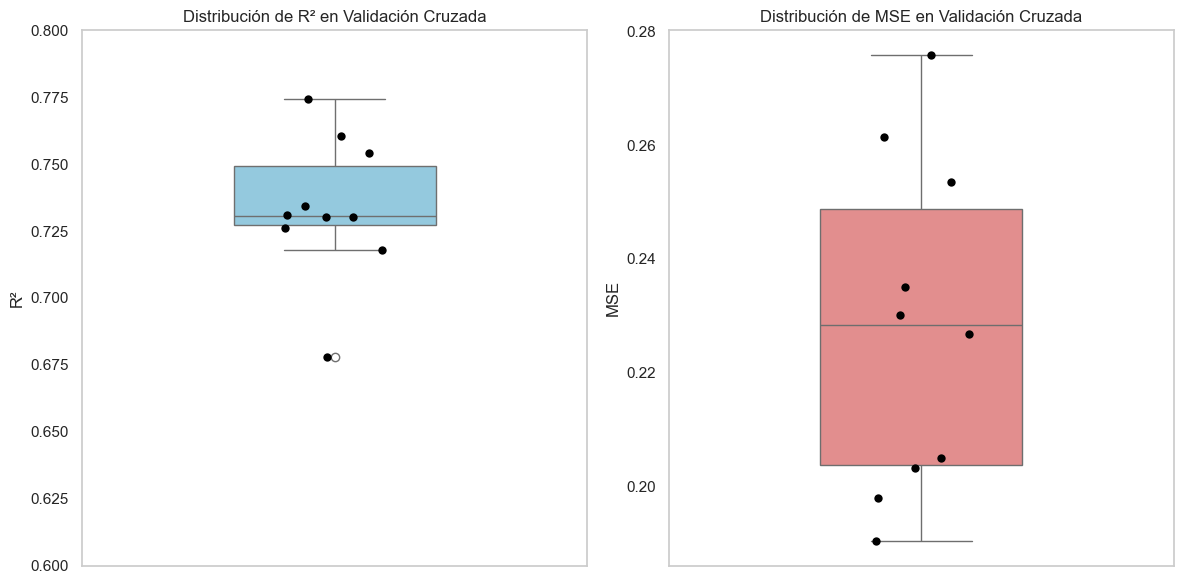

In [148]:
# Apoyo gráfico para interpretar la validación
# Crear DataFrame con las métricas obtenidas por fold
cv_results = pd.DataFrame({
    'R²': r2_scores,
    'MSE': mse_scores
})

plt.figure(figsize=(12, 6))

# Boxplot para R²
plt.subplot(1, 2, 1)
sns.boxplot(y=cv_results['R²'], color='skyblue', width=0.4)
sns.stripplot(y=cv_results['R²'], color='black', size=6, jitter=0.1)
plt.title('Distribución de R² en Validación Cruzada')
plt.ylabel('R²')
plt.ylim(0.6, 0.8)
plt.grid(axis='y')

# Boxplot para MSE
plt.subplot(1, 2, 2)
sns.boxplot(y=cv_results['MSE'], color='lightcoral', width=0.4)
sns.stripplot(y=cv_results['MSE'], color='black', size=6, jitter=0.1)
plt.title('Distribución de MSE en Validación Cruzada')
plt.ylabel('MSE')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

### Pregunta 8 ###
A la vista de los resultados de validación, ¿Existen problemas de varianza en los modelos entrenados?¿Por qué? 

***Respuesta:***

Para responder a la pregunta de si existen problemas de varianza en los modelos entrenados debemos fijarnos en la desviación estandard tanto de R^2 como de MSE. Si la desviación estándard es baja indica que la variabilidad entre las distintas particiones es baja, es decir, el rendimiento del modelo no cambia mucho dependiendo de qué subconjunto de datos se use para entrenamiento/prueba. Esto sugerirá que no hay un problema seria de varianza alta.

En nuestro caso, tanto para el R^2 como para el MSE la varianza es baja, 0.025 y 0.027 respectivamente, por lo que podemos afirmar que nuestro modelo no tiene problemas de varianza.

Como siguiente paso, vamos a aplicar selección de variables a nuestro conjunto de datos para ver si somos capaces de encontrar un modelo que, a través de un conjunto menor de variables, sea capaz de predecir muy parecido o mejor incluso que el modelo de regresión lineal que acabamos de obtener en primera instancia.

Para ello vamos a proceder de dos formas. La primera consiste en llevar a cabo un metodo automatico de selección de variables hacía adelante (Forward). En los siguientes bloques de código, se ha de programar las instrucciones necesarias para llevar a cabo esta selección de variables. Se valorará mostrar el gráfico secuencial que muestra el perfomance de cada iteración. 

In [149]:
# Selección Forward de variablesç# Modelo base: regresión lineal
modelo = LinearRegression()

# Selección hacia adelante
sfs = SFS(modelo,
          k_features='best',        # Puede ser un número entero o 'best' para auto-selección
          forward=True,
          floating=False,
          scoring='r2',             # Métrica para regresión: 'r2' o 'neg_mean_squared_error'
          cv=5,                     # Validación cruzada con 5 folds
          n_jobs=-1)               # Usa todos los núcleos disponibles

# Ajustar el selector a los datos
sfs.fit(X, y)  # Usa los datos originales, no divididos aún

# Resultados
print('Mejor R²:', sfs.k_score_)
print('Número de variables seleccionadas:', len(sfs.k_feature_names_))
print('Variables seleccionadas:', list(sfs.k_feature_names_))


Mejor R²: 0.6661512304013686
Número de variables seleccionadas: 3
Variables seleccionadas: ['Education Level', 'Years of Experience', 'Gender_Male']


El modelo de selección de variables hacia adelante s(forward) ha seleccionado tres variables como las idoneas para muestro modelo ['Education level','Yeas of Experiencie','Gender_Male']

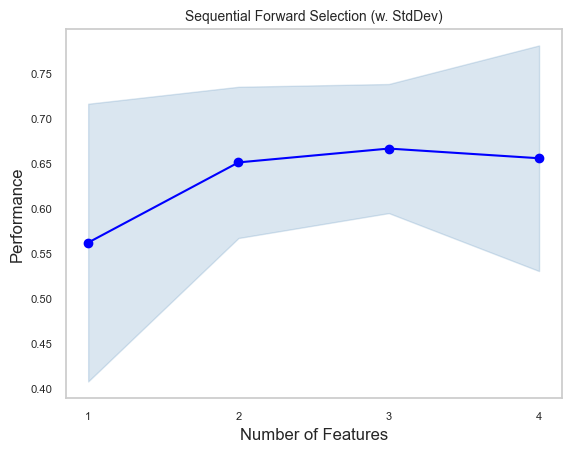

In [150]:
# Gráfico de perfomance de la selección en cada iteración.
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

#plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid()
plt.show()

### Pregunta 9 ###
¿Cuál es el número de variables seleccionadas por el método aplicado? ¿cuál es el valor de la métrica escogida para la selección de las variables, en la iteración correspondiente al número de variables seleccionadas?

***Respuesta:***

Una vez aplicado el proceso de selección de variables hacia adelante, las variables seleccionadas son tres ['Education Leve','Years of Experience', 'Gender_Male'].

El mejor R^2 promedio en validación cruzada fue de 0.666, lo que indica que el modelo explica aproximadamente el 66,66% de la variabilidad del salario utilizando solo estas 3 variables.

Una vez realizada la selección de variables, se ha de entrenar un modelo de regresión lineal con dichas variables y mostrar el resumen del modelo entrenado. Una vez entrenado, aplicar validación cruzada para evaluar el modelo en todo el conjunto de datos para validar la generalización del modelo. De nuevo, la validación ha de ser en base a las 2 métricas escogidas en puntos anteriores, sobre conjuntos de test y han de mostrarse los resultados en diagramas de tipo de boxplot o que permitan entender cómo generaliza el modelo.

In [151]:
# Ajustar modelo regresión lineal para variables seleccionadas
# Definir la variable objetivo (y) y las predictoras (X)
y = data_balanced['Salary']
X = data_balanced.drop(['Salary','Senior'],axis=1)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo
X_train = sm.add_constant(X_train) # Agrega una constant (columna de 1) al conjunto de entrenamiento X_train (beta 0), es necesario, pues la libreria statsmodels no incluye la constante en el modelo

# Crear y ajustar el modelo
model_2 = sm.OLS(y_train, X_train).fit() # Aplicamos el modelo de minimos cuadrados ordinarios al conjunto de entrenamiento

# Extraer coeficientes 
coef = model_2.params

In [152]:
# Mostrar principales atributos, coeficientes, etc. del modelo entrenado
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     1343.
Date:                Tue, 15 Jul 2025   Prob (F-statistic):               0.00
Time:                        17:19:36   Log-Likelihood:                -1013.8
No. Observations:                1486   AIC:                             2036.
Df Residuals:                    1482   BIC:                             2057.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1211    

In [189]:
# Aplicar validación cruzada
model_2 = LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Validación cruzada
r2_scores = cross_val_score(model_2, X, y, cv=kf, scoring='r2')
mse_scores = cross_val_score(model_2, X, y, cv=kf, scoring=make_scorer(mean_squared_error, greater_is_better=False))

# MSE en positivo
mse_scores = -mse_scores

print(f'R² promedio: {r2_scores.mean()}')
print(f'R² std: {r2_scores.std()}')
print(f'R² por fold: {r2_scores}')

print(f'MSE promedio: {mse_scores.mean()}')
print(f'MSE std: {mse_scores.std()}')
print(f'MSE por fold: {mse_scores}')

R² promedio: 0.7266360774757982
R² std: 0.03135843828312751
R² por fold: [0.73166101 0.71032025 0.72529245 0.71229373 0.76493561 0.65626361
 0.77243869 0.7178194  0.72191373 0.75342229]
MSE promedio: 0.23388775915816634
MSE std: 0.03173255602276938
MSE por fold: [0.22894815 0.2684699  0.21015741 0.24699858 0.19427802 0.29432985
 0.19203216 0.21496886 0.26113133 0.22756334]


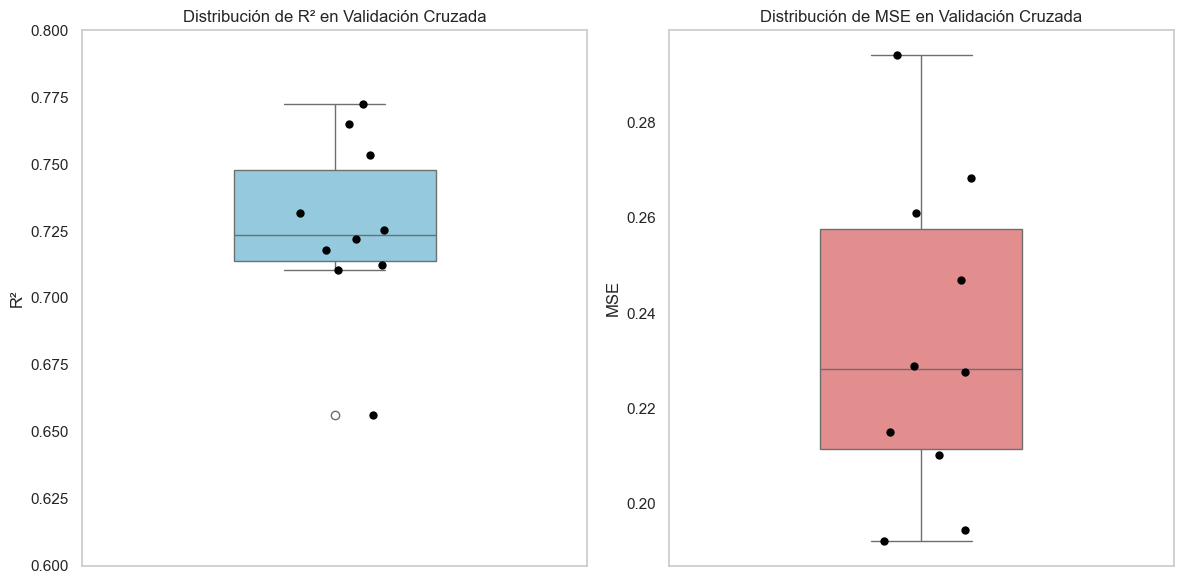

In [190]:
# Apoyo gráfico para interpretar la validación
cv_results = pd.DataFrame({
    'R²': r2_scores,
    'MSE': mse_scores
})

plt.figure(figsize=(12, 6))

# Boxplot para R²
plt.subplot(1, 2, 1)
sns.boxplot(y=cv_results['R²'], color='skyblue', width=0.4)
sns.stripplot(y=cv_results['R²'], color='black', size=6, jitter=0.1)
plt.title('Distribución de R² en Validación Cruzada')
plt.ylabel('R²')
plt.ylim(0.6, 0.8)
plt.grid(axis='y')

# Boxplot para MSE
plt.subplot(1, 2, 2)
sns.boxplot(y=cv_results['MSE'], color='lightcoral', width=0.4)
sns.stripplot(y=cv_results['MSE'], color='black', size=6, jitter=0.1)
plt.title('Distribución de MSE en Validación Cruzada')
plt.ylabel('MSE')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

### Pregunta 10 ###
En base a los resultados obtenidos, comparar con los resultados obtenidos para el modelo de regresión lineal y explicar las conclusiones sobre cuál de los 2 modelos parece aportar más beneficios para el objetivo del proyecto.

***Respuesta:***

En base a los resultados obtenidos, al comaprar ambos modelos de regresión lineal podemos extraer varias conclusiones relevantes para el objetivo del proyecto, que es predecir el salario de manera eficeitne y fiable.

El modelo 1, que incluye las cuatro variables presenta un ajuste ligeramente superior, con un R^2 de 0,739 frente al 0,731 del Modelo 2, que excluye la variable Senior. Además, los criterios de información AIC y BIC también son más bajos en el Modelo 1, indicando un mejor equilibrio entre ajuste y complejidad del modelo.

Por otr lado, el coeficiente negativo y significativo de la variable Senior en el Modelo 1 sugiere que esta variable aporta información valiosa y relevante para explicar la variabilidad del salario, a pesar de su efecto adverso. Esto implica que el estado Senior influye de forma significativa en la predicción, y su exclusión en el Modelo 2 puede estar limitando el potencial explicativo del modelo.

En cuanto a la validación cruzada, ambos modelos muestran un desempeño similar en términos de R^2 y MSE, lo que indica que ambos generalizan de manera parecida sobre datos no vistos. Esto suiere que la complejidad añadida en el Modelo 1 no está provocando sobreajuste, manteniendo una buena capacidad predictiva.

Por último, la elección entre ambos modelos depednerá del balance deseado entre precisión y simplicidad. Si el objetivo principal es maximizar la precisión en la predicción del salario, el Modelo 1 es la opción más adecuada, ya que incopora una variable significativa y mejora el ajuste en general. Sin embargo, si se busca un modelo más parsimonioso, con menor número de variables para facilitar la interpretación o la implementación, el Modelo 2 sigue siendo una alternativa válida y eficiente, con solo una ligera pérdida en ajuste.

En resumen, el Modelo 1 aporta mayores beneficios para el objetivo del proyecto, ofreciendo un mejor ajsute y aprovechando toda la información relevante disponible, sin sacrificar la capacidad de generalización.

Ahora se ha de entrenar un nuevo modelo de regresión lineal pero esta vez, en lugar de aplicar una selección de variables como se acaba de realizar, el alumno debe llevar a cabo un <b>analisis de compoenentes principales </b> que reduzca la dimensionalidad del conjunto original de datos. Y a partir de dichas componentes, entrenar y evaluar el modelo de regresión lineal.

En primer lugar, se han escribir los bloques de código que permiten realizar el analisis de componentes principales.

In [197]:
# Crear el analisis de PCA a partir del conjunto de variables predictoras
# Definir variable objetivo y predictoras
y = data_balanced['Salary']
X = data_balanced.drop(['Salary'], axis=1)

# Estandarizar los datos (muy importante para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada por cada componente
explained_var = pca.explained_variance_
explained_var_ratio = pca.explained_variance_ratio_
autovectores = pca.components_
cumulative_variance = np.cumsum(explained_variance)

In [198]:
df_pca_results = pd.DataFrame({
    'Componente': np.array(range(pca.n_components_)),
    'Explained Variance': explained_var,
    'Explained Variance Ratio': explained_var_ratio
})

# Agregar la columna con la suma acumulada del ratio
df_pca_results['Acumulative Explained Variance Ratio (%)'] = 100 * df_pca_results['Explained Variance Ratio'].cumsum()
df_pca_results

,Componente,Explained Variance,Explained Variance Ratio,Acumulative Explained Variance Ratio (%)
0,0,1.972675,0.492903,49.290329
1,1,0.990512,0.247495,74.039809
2,2,0.607701,0.151844,89.224169
3,3,0.431265,0.107758,100.000000


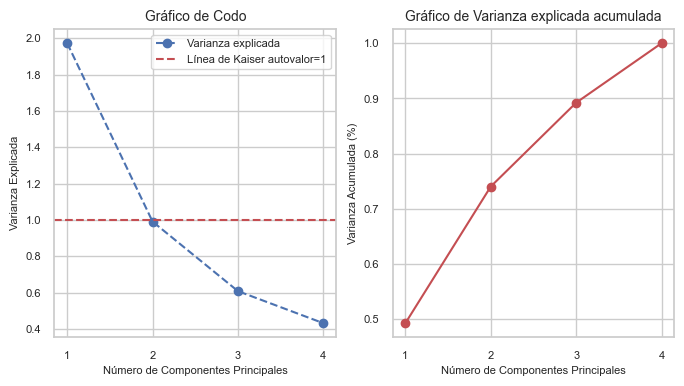

In [199]:
plt.figure(figsize=(8, 4))

# Varianza explicada por cada componente
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o', linestyle='--', color='b', label='Varianza explicada')
plt.axhline(y=1, color='r', linestyle='--', label='Línea de Kaiser autovalor=1')
plt.title('Gráfico de Codo', fontsize=10)
plt.xlabel('Número de Componentes Principales', fontsize=8)
plt.ylabel('Varianza Explicada', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(fontsize=8)

# Varianza explicada acumulada
plt.subplot(1, 2, 2)
cumulative_var_ratio = np.cumsum(explained_var_ratio)
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o', linestyle='-', color='r', label='Varianza explicada acumulada')
plt.title('Gráfico de Varianza explicada acumulada', fontsize=10)
plt.xlabel('Número de Componentes Principales', fontsize=8)
plt.ylabel('Varianza Acumulada (%)', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Mostrar el gráfico
plt.grid(True)
plt.show()

### Pregunta 11 ###
Para un porcentaje de varianza explicada del 95%, ¿cuál es el número de componentes principales que consiguen explicar dicho porcentaje de varianza?

***Respuesta:***

Para explica el 95% de la varianza debemos utilizar 4 componentes, pues a partir del tercer componente se explica el 89,22%, lom que no explicamos el 95%.

A continuación, con las nuevas componentes principales como variables predictoras y los datos proyectados sobre ellas, entrenar un modelo de regresión lineal y mostrar los resultados del entrenamiento. Una vez entrenado, aplicar validación cruzada para evaluar el modelo en todo el conjunto de datos validando así la generalización del modelo. De nuevo, la validación ha de ser en base a las 2 métricas escogidas en puntos anteriores, sobre conjuntos de test y han de mostrarse los resultados en diagramas de tipo de boxplot o que permitan entender cómo generaliza el modelo.

In [214]:
# Ajustar modelo regresión lineal para variables seleccionadas proyectadas

y = data_balanced['Salary']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo
X_train = sm.add_constant(X_train) # Agrega una constant (columna de 1) al conjunto de entrenamiento X_train (beta 0), es necesario, pues la libreria statsmodels no incluye la constante en el modelo

# Crear y ajustar el modelo
model_pca = sm.OLS(y_train, X_train).fit() # Aplicamos el modelo de minimos cuadrados ordinarios al conjunto de entrenamiento

# Extraer coeficientes 
coef_pca = model_pca.params

In [216]:
# Mostrar principales atributos, coeficientes, etc. del modelo entrenado
print(model_pca.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1051.
Date:                Tue, 15 Jul 2025   Prob (F-statistic):               0.00
Time:                        18:42:59   Log-Likelihood:                -990.60
No. Observations:                1486   AIC:                             1991.
Df Residuals:                    1481   BIC:                             2018.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2232      0.012     18.223      0.0

In [217]:
# Aplicar validación cruzada
# Crear el modelo
modelo_cv = LinearRegression()

# Definir validación cruzada (k-fold con k=5, por ejemplo)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Calcular puntuaciones de R² en cada fold
scores_r2 = cross_val_score(modelo_cv, X_pca, y, cv=kf, scoring='r2')
scores_mse = cross_val_score(modelo_cv, X_pca, y, cv=kf, scoring='neg_mean_squared_error')

# Mostrar resultados
print("Validación cruzada con TODAS las componentes PCA:")
print(f"R² por fold: {scores_r2}")
print(f"R² promedio: {np.mean(scores_r2):.4f}")
print(f"MSE por fold: {-scores_mse}")
print(f"MSE promedio: {-np.mean(scores_mse):.2f}")

Validación cruzada con TODAS las componentes PCA:
R² por fold: [0.72444337 0.73357763 0.71937598 0.75375476 0.74437506]
R² promedio: 0.7351
MSE por fold: [0.24545038 0.21884648 0.23612726 0.19769513 0.23894098]
MSE promedio: 0.23


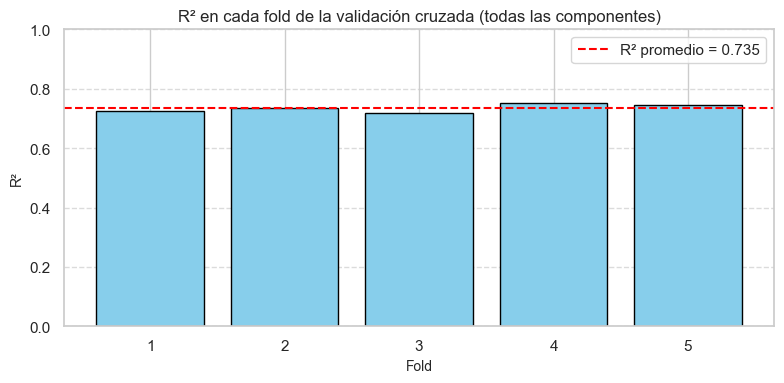

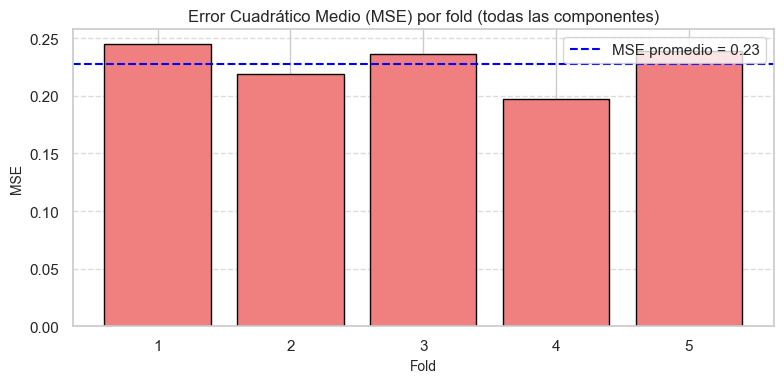

In [218]:
# Apoyo gráfico para interpretar la validación
# Gráfico de barras para R² en cada fold
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(scores_r2) + 1), scores_r2, color='skyblue', edgecolor='black')
plt.axhline(np.mean(scores_r2), color='red', linestyle='--', label=f'R² promedio = {np.mean(scores_r2):.3f}')
plt.title('R² en cada fold de la validación cruzada (todas las componentes)', fontsize=12)
plt.xlabel('Fold', fontsize=10)
plt.ylabel('R²', fontsize=10)
plt.xticks(range(1, len(scores_r2) + 1))
plt.ylim(0, 1)  # R² va de 0 a 1 (puedes ajustar si hay valores negativos)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Convertir MSE negativo a positivo
mse_scores = -scores_mse

plt.figure(figsize=(8, 4))
plt.bar(range(1, len(mse_scores) + 1), mse_scores, color='lightcoral', edgecolor='black')
plt.axhline(np.mean(mse_scores), color='blue', linestyle='--', label=f'MSE promedio = {np.mean(mse_scores):.2f}')
plt.title('Error Cuadrático Medio (MSE) por fold (todas las componentes)', fontsize=12)
plt.xlabel('Fold', fontsize=10)
plt.ylabel('MSE', fontsize=10)
plt.xticks(range(1, len(mse_scores) + 1))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Pregunta 12 ###
En vista de los resultados, comparar con los anteriores 2 modelos entrenados (el original de regresión lineal y aquel al que aplicamos selección de variables con método forward). ¿Qué modelo de entre los 3 tiene el atributo *Condition Number* más bajo y por qué? En general y a modo de conclusión, ¿Qué modelo de los 3 parece más apropiado para el caso de uso y por qué?

***Respuesta:***

Al comparar os tres modelos ajustados se osberva que el atributo Condition Number presenta diferencias significativas que reflejan la estabilidad y multicolinealidad de cada uno.

El modelo 1 tiene un Condition Number de 4,27, indicando cierta correlación entre variables predictorias que puede afectar la estabildiad numérica y la confiabilidad de los coeficientes estimados. El modelo con selección forward reduce este valor a 3.51, lo que evidendcia que la eliminación de variables irrelevantes contribuye a disminuir la colinealidad, mejorando la robustez del modelo sin perder demasiada información.

Por su parte, el modelo PCA alcanza el Condition Numbre más bajo, con un valor de 2,14. Esto se explica porque las componentes principales son ortogonales entre sí, eliminando cualquier correlación lineal y, por ende, la multicolinealidad. Esto genera un modelo numéricamente más estable y con mayor capacidad de generalización.

En terminos de desempñeo, los tres modelos presentan valores similares de R-Cuadrado ajsutado, lo que indica que mantienen una capacidad explicativa comparable.

El modelo basado en PCA es el más adecuado desde el punto de vista estadístico, debido a su baja multicolinealidad y alta estabilidad numérica. No obstante, su principal limitación radica en la interpretación menos intuitiva de sus coeficientes, dado que las variables predictoras son combinaciones lineales de las originales.

El modelo con selección forward constituye un buen compromiso, ya que mejora la estabilidad del modelo al reducir variables redundantes, manteniendo una interpretación clara y directa.

Finalmente, el modelo original es menos recomendable, dado que la multicolinealidad puede afectar la precisión y confiabilidad de sus estimaciones.

Por lo tanto, la elección del modelo más apropiado depende del objetivo principal: si la prioridad es la interpretabilidad, se sugiere el modelo con selección forward; si se prioriza la estabilidad y robustez predictiva, el modelo PCA es la mejor opción.

Pasamos ahora a cambiar el objetivo del proyecto pero haciendo uso del mismo conjunto de datos. Todas las transformaciones y preparaciones comunes que hayamos establecido, seguirán siendo válidas y tan solo quedarán aquellas específicas para este nuevo caso de uso.

La nueva variable objetivo será ***Gender***. El modelo debe ser capaz de determinar para cada registro si se trata de hombre o mujer según esta variable de genero. Las variables predictoras serán todas las demás (incluyendo en esta ocasión la variable ***Salary*** como una predictora más. El modelo que vamos a tratar de modelar para clasificar nuestros datos será de regresión logística.

En primer lugar, se debe transformar la variable categórica ***Gender*** codificándola con 0 cuando el registro sea *Female* o 1 cuando es *Male*. Una vez realizada esta transformación, ya tenemos preparada nuestra variable objetivo. En este caso, mantenemos y asumimos como valores correctos la imputación de valores nulos que se llevó a cabo en anteriores ejercicios correspondientes a la fase de preparación de los datos.

In [230]:
# Binarizar la variable objetivo, recuperamos datos balanceados, limpios i estandarizados anteriores
data_balanced.head() # Ya tenemos binarizada la variable y balanceada la variable Senior

,Education Level,Years of Experience,Salary,Senior,Gender_Male
2,1.578936,1.264444,0.673552,1,1
9,1.578936,0.381429,-0.086550,1,1
17,1.578936,0.734635,0.008463,1,1
28,1.578936,1.264444,0.483527,1,0
34,1.578936,2.147459,1.053603,1,1


In [232]:
# Vemos que no tiene ningún valor nulo
data_balanced.isnull().sum()

Education Level        0
Years of Experience    0
Salary                 0
Senior                 0
Gender_Male            0
dtype: int64

A continuación, podríamos tratar de modelar la regresión logística con el dataset actual, tomando como variable objetivo ***Gender*** que acabamos de transformar. Lo más normal es que al hacerlo, el modelo de un error al entrenarlo por no llegar a converger o directamente porque la matriz a invertir para calcular los coeficientes, sea singular y no pueda invertirse. Esto se debe a colinealidad entre las variables predictoras. Queda a criterio del alumno, hacer él mismo la prueba de tratar de entrenar la regresión y verificar si efectivamente da problemas y no se consigue un modelo válido.

Por evitar esta situación, vamos a realizar un paso previo que consistirá en un analisis factorial, mediante el cual daremos con unos factores que por un lado nos aportarán información potencial subyacente sobre las variables latentes que pueda contener nuestro conjunto de variables predictoras, y por otro lado nos ayudará a reducir la dimensionalidad del conjunto para evitar la multicolinealidad. Esto nos permitirá llevar a cabo el entrenamiento del modelo de regresión lineal.

Los siguientes bloques de código deben ajustar un analisis de componentes principales a partir de nuestro conjunto de variables predictoras recién definido. Después se debe mostrar en una tabla cada uno de los autovectores, su correspondiente autovalor, el porcentaje de varianza explicada y el porcentaje de varianza acumulada estando las componentes ordenadas de mayor a menor porcentaje de varianza explicada. Por último, se debe mostrar en un gráfico de tipo scree-plot (gráfico de codo), la varianza explicada en función del número de componentes principales.

In [236]:
# Usar PCA para obtener autovectores y autovalores

# Definir variables predictoras (excluir 'Gender_Male')
X = data_balanced.drop(['Gender_Male'], axis=1)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X)

autovalores = pca.explained_variance_
autovectores = pca.components_
var_exp_ratio = pca.explained_variance_ratio_
var_exp_acum = np.cumsum(var_exp_ratio)

In [237]:
# Mostrar la tabla con autovectores, autovalores, porcentaje de varianza explicada y acumulada
df_pca = pd.DataFrame({
    'Componente': [f'PC{i+1}' for i in range(len(autovalores))],
    'Autovalor': autovalores,
    'Varianza Explicada (%)': var_exp_ratio * 100,
    'Varianza Explicada Acumulada (%)': var_exp_acum * 100
})
print(df_pca)

  Componente  Autovalor  Varianza Explicada (%)  \
0        PC1   2.369302               74.057424   
1        PC2   0.476090               14.881188   
2        PC3   0.224572                7.019451   
3        PC4   0.129313                4.041936   

   Varianza Explicada Acumulada (%)  
0                         74.057424  
1                         88.938612  
2                         95.958064  
3                        100.000000  


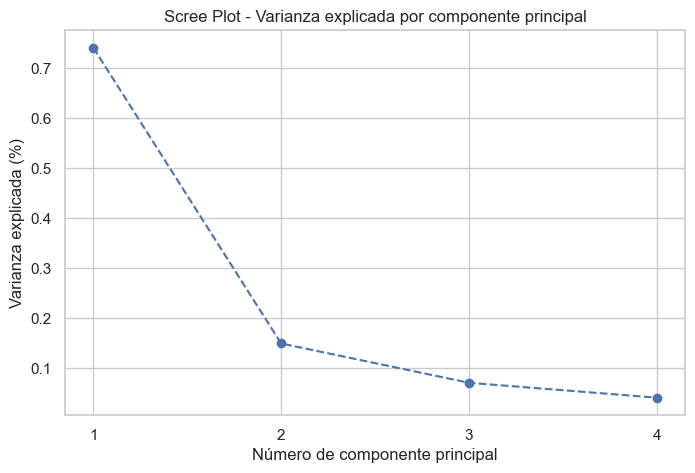

In [238]:
# Scree-plot de varianza explicada
# Porcentaje de varianza explicada por cada componente
var_exp_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(var_exp_ratio) + 1), var_exp_ratio, marker='o', linestyle='--', color='b')
plt.title('Scree Plot - Varianza explicada por componente principal')
plt.xlabel('Número de componente principal')
plt.ylabel('Varianza explicada (%)')
plt.xticks(range(1, len(var_exp_ratio) + 1))
plt.grid(True)
plt.show()

### Pregunta 13 ###
De acuerdo a los resultados de la tabla, ¿Qué número de componentes consiguen explicar el 95% de la varianza conjunta de nuestro dataset?
Por otor lado, viendo también la gráfica obtenida, ¿Cuántos factores debemos escoger según el criterio de Kaiser?

***Respuesta:***

Según los resultados obtenidos en la tabla, los primeros tres componentes principales consiguen explicar cojuntamente aproximadamente el 95,96% de la varianza total del dataset. Esto indica que con solo estos tres componentes podemos captura la gran mayoría de la información presente en las variables originales.

Por otro lado, aplicando el criterio de Kaiser, que sugiere conservar únicamente aquellos componentes con un autovalor mayor a 1, se debería seleccionar únicamente el primer componente principal, ya que es el único que cumple con este requisito (autovalor = 2.37).

En resumen, según el criterio de varianza explicada acumulada, se recomendaría conservar 3 componentes para mantener una representación fiel de los datos, mientras que según el criterio de Kaiser bastaría con 1 componente. La elección entre ambos dependerá del balance que se quiera lograr entre simplicidad del modelo y la cantidad de información retenida.

Muestra en una tabla las cargas factoriales para el listado de variables. Cada columna debe hacer referencia a cada factor seleccionado mediante el criterio de Kaiser.

In [239]:
# Ajuste de Analisis Factorial para numero de factores según Kaiser
n_factores = 1  # Decidido segun Kaiser
fa = FactorAnalysis(n_components=n_factores, random_state=42)

# Ajustar el modelo a los datos originales
fa.fit(data_balanced)

FactorAnalysis(n_components=1, random_state=42)

In [241]:
# Matriz de cargas factoriales
cargas_factoriales = fa.components_

# Crear un DataFrame con las cargas factoriales
# Las filas corresponden a los factores, las columnas a las variables originales
df_cargasFact = pd.DataFrame(cargas_factoriales.T, columns=[f'Comp_{i+1}' for i in range(n_factores)], index=data_balanced.columns)

# Mostrar los factores extraídos
df_cargasFact

,Comp_1
Education Level,0.690131
Years of Experience,0.913280
Salary,0.858393
Senior,0.221665
Gender_Male,0.069927


### Pregunta 14 ###
En base a los factores seleccionados mediante el método de Kaiser, haz una interpretación del significado de los factores.

***Respuesta:***

A partir del análisis factorial realizado co  un único facor (seleccionado según el crtierio de Kaiser, es decir, considerando solo los componentes con autovalor mayor a 1), se ha obtenido las siguientes cargas factoirales:

* Years of Experience: 0.913
* Salary: 0.858
* Education Level: 0.690
* Senior: 0.222
* Gender_Male: 0.070

Estas cargas indican la correlación entre cada variable original y el factor extraído. Observamos que las variables Years of Experience, Salary y Education Level presentan cargas altas, lo que sugiere que el factor principal está capturando la mayor parte de la varianza compartida por estas variables. En consecuencia, este factor puede ser interpretado como un indicador general de trayectoria profesional o nivel de capital humano. Es decir, agrupa a los individuos según su formación, experiencia y nivel salarial, reflejando el grado de desarrollo profesional alcanzado.

En contraste, las variables Senior y especialmente Gender_Male tienen cargas muy bajas, lo que indica que no están bien representadas por este factor. Esto sugiere que dichas variables podrían estar asociadas a otras dimensiones no capturadas por el componente principal extraído.

Para continuar con el analisis, vamos a seleccionar los 2 primeros factores. En el siguiente bloque de código se ha de presentar una tabla con las cargas factoriales de cada variable para los 2 factores seleccionados. Aplicar una rotación si se considera oportuno para ayudar a la interpretación de los factores. Después, se ha de mostrar en otra tabla las comunalidades y unicidades (ambas en expresadas como porcentaje). Por último, se ha de mostrar un diagrama biplot que represente, en función de los 2 factores escogidos, las variables que mayor representación según las cargas factoriales. Es decir, aquellas variables que tengan al menos una carga factorial mayor que 0.3. Esto reducirá el número de vectores a representar y hará que la visualización sea más legible.

In [242]:
# Tabla de cargas factoriales para los 2 factores (incluyendo rotación si se elige)
# Número de factores
n_factores = 2

# Ajuste del modelo con rotación varimax
fa = FactorAnalyzer(n_factors=n_factores, rotation='varimax')
fa.fit(data_balanced)

# Obtener cargas factoriales
cargas_factoriales = fa.loadings_
df_cargasFact = pd.DataFrame(cargas_factoriales, columns=[f'Factor_{i+1}' for i in range(n_factores)], index=data_balanced.columns)

# Mostrar tabla de cargas factoriales
print("Cargas Factoriales:")
display(df_cargasFact)

Cargas Factoriales:


C:\Users\pauri\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Factor_1,Factor_2
Education Level,0.589539,0.338469
Years of Experience,0.750630,0.365881
Salary,0.982734,0.200447
Senior,0.166134,0.921769
Gender_Male,0.137628,0.005646


In [243]:
# Tabla de comunalidades y unicidades
# Calcular comunalidades y unicidades (ambas en porcentaje)
comunalidades = fa.get_communalities() * 100
unicidades = fa.get_uniquenesses() * 100

# Crear DataFrame con comunalidades y unicidades
df_com_unic = pd.DataFrame({
    'Comunalidad (%)': comunalidades,
    'Unicidad (%)': unicidades
}, index=data_balanced.columns)

# Mostrar tabla
print("Comunalidades y Unicidades (%):")
display(df_com_unic)



Comunalidades y Unicidades (%):


,Comunalidad (%),Unicidad (%)
Education Level,46.211704,53.788296
Years of Experience,69.731416,30.268584
Salary,100.594451,-0.594451
Senior,87.725864,12.274136
Gender_Male,1.897323,98.102677


In [244]:
# Filtrado de variables para representación biplot
umbral = 0.3
mask = (df_cargasFact.abs() > umbral).any(axis=1)
df_cargas_biplot = df_cargasFact[mask]

print(f"Variables seleccionadas para el biplot (carga > {umbral}):")
display(df_cargas_biplot)

Variables seleccionadas para el biplot (carga > 0.3):


,Factor_1,Factor_2
Education Level,0.589539,0.338469
Years of Experience,0.750630,0.365881
Salary,0.982734,0.200447
Senior,0.166134,0.921769


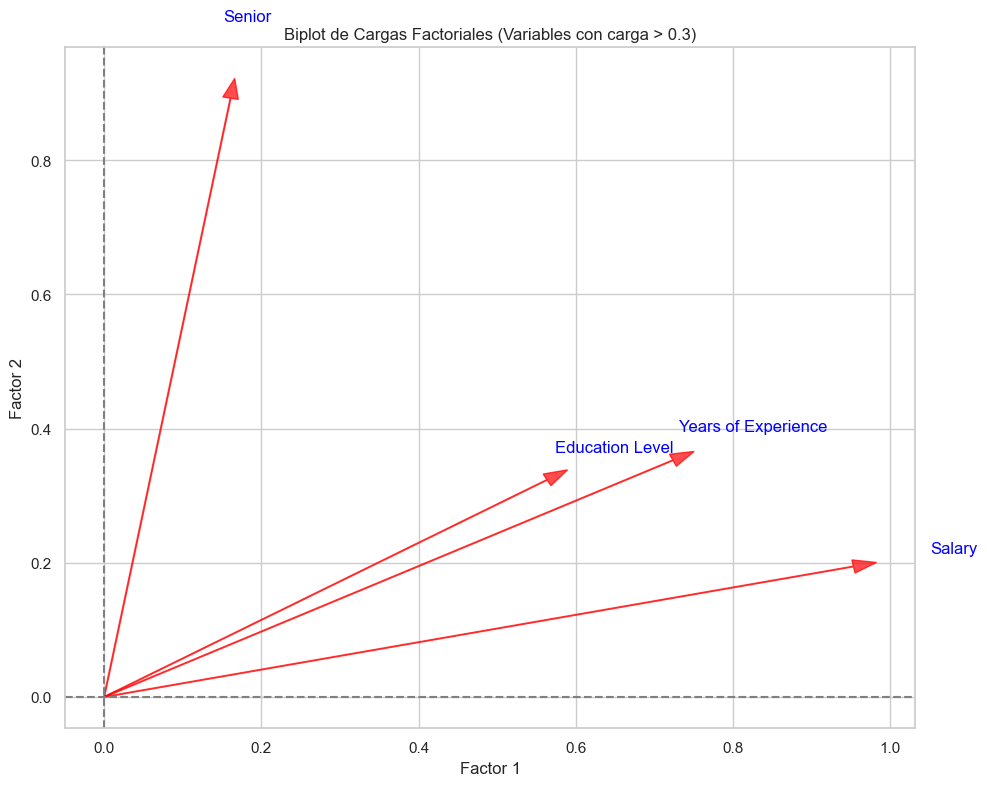

In [245]:
# Representación gráfica biplot de vectores de variables
# Crear figura
plt.figure(figsize=(10, 8))

# Dibujar los vectores para cada variable
for i in range(df_cargas_biplot.shape[0]):
    x = df_cargas_biplot.iloc[i, 0]
    y = df_cargas_biplot.iloc[i, 1]
    plt.arrow(0, 0, x, y, color='red', alpha=0.7, head_width=0.02, length_includes_head=True)
    plt.text(x * 1.1, y * 1.1, df_cargas_biplot.index[i], color='blue', ha='center', va='center')

# Añadir líneas guía y etiquetas
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Biplot de Cargas Factoriales (Variables con carga > 0.3)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Pregunta 15 ###
Según los resultados mostrados, ¿Qué interpretación podemos hacer de los porcentajes de comunalidades y unicidades? En caso de obtener unicidades por debajo de 0, ¿A qué se debe?. Analizando el diagrama biplot, ¿Qué podemos concluir acerca de las variables representadas?

***Respuesta:***

Las comunalidades representan el porcentaje de varianza de cada variable que es explciado por los facotres extraídos en el análisis factoruial, mientras que las unicidades corresponden a la proporcioón de varianza no explciada por dichos factores.

En el caso analizado, se osberva que variables como Years of Experience o Senior presentan comunalidades elevadas, del 69,73% y 87,73% respectivamente, lo que indica que la mayoría de la varianza de estas variables está bien explicada por los factores obtenidos. Esto sugiere que ambas variables están fuertemente relacionadas con la estructura factorial identificada.

Por otro lado, Education Level muestra una comunaldiad moderada (46,21%) indicando que menos de la mitad de su varianza queda explicada por os facotres, lo que implica una representaión algo más débil dentro del modelo.

La variable Gender_Male presenta una comunalidad muy baja (1.90%). Esto se debe a que es la variable que trataremos de explicar

Finalmente, se detecta un caso particular en la variable Salary, que muestra una comunalidad superior al 100% y una unicidad negativa (-0.59%), lo caul es estadísticamente inconsisntente. Este resultado sugiere un posible problema en el ajuste del modelo, como la presencia de multicolinealidad, un número inadecuado de factores, o datos problemáticos en esa variable que requieren revisión adicional.

Observado el biplot, se puede apreciar claramente una direrenciación en la orientación de las variables representadas. En concreto, se osberva que las variables Education Level, Years of Experience y Salary presentan vectores que apuntan en una dirección similar, alineados principalmente hacia el eje del Factor 1. Esta oritentación común sugiere que estas tres variables comparten una estructura subyacente y están fuertemente correlacionadas entre sí. En otras palabras, el Factor 1 parece captar una dimensión latente relacionada con el desarrollo profesional o el nivel socioeconómico, ya que agrupa variables típicamente asociadas al perfil profesional de una persona.

Por otro lado, la variable Senior muestra una dirección completamente distinta, apuntando hacia el eje del Factor 2. Esto indica que su variabilidad está explicada en mayor medida por este segundo factor, y que no guarda una relación significativa con las tres variables anteriores. El hecho de que el vector de “Senior” forme un ángulo cercano a 90° respecto a los otros vectores sugiere que esta variable es estadísticamente independiente (o poco correlacionada) de las demás en el espacio bidimensional definido por los dos factores.

Esta separación direccional entre los grupos de variables implica que estamos ante dos dimensiones conceptualmente distintas: una asociada a la experiencia y nivel educativo (Factor 1) y otra posiblemente más relacionada con la posición organizacional o el estatus dentro de la empresa (Factor 2).

Seguimos con el diseño de nuestro modelo para intentar distinguir entre *Male* y *Female* para cada uno de los registros del conjunto de datos. Para ello vamos a tratar de modelar la regresión logística.

Vamos a tratar de reducir la dimensionalidad de nuestro conjunto de variables predictoras aplicando un método de regularización. De esta forma trataremos de diseñar un modelo de regresión logística con regularización que evite en la medida de lo posible la multicolinealidad y manteniendo la máxima información posible acerca de nuestra variable objetivo. 

En los siguientes bloques de código, se ha de terminar de transformar el conjunto de datos para que pueda ser utilizado en un modelo de regresión logística. Ya se realizó la binarización de la variable objetivo ***Gender*** pero ahora queda normalizar, estandarizar y demás operaciones que considere el alumno oportunas para este modelo.

In [249]:
data_balanced.head()

,Education Level,Years of Experience,Salary,Senior,Gender_Male
2,1.578936,1.264444,0.673552,1,1
9,1.578936,0.381429,-0.086550,1,1
17,1.578936,0.734635,0.008463,1,1
28,1.578936,1.264444,0.483527,1,0
34,1.578936,2.147459,1.053603,1,1


In [248]:
# Separar variables predictoras (X) y variable objetivo (y)
X = data_balanced.drop(columns=['Gender_Male'])
y = data_balanced['Gender_Male']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [250]:
# Codificación de categóricas, no es necesario pues nuestro dataset es todo numérico
data_balanced.head()

,Education Level,Years of Experience,Salary,Senior,Gender_Male
2,1.578936,1.264444,0.673552,1,1
9,1.578936,0.381429,-0.086550,1,1
17,1.578936,0.734635,0.008463,1,1
28,1.578936,1.264444,0.483527,1,0
34,1.578936,2.147459,1.053603,1,1


Una vez preparados los datos, pasamos a modelar la regresión logísitica aplicando una regularización LASSO. Queda a discreción del alumno la configuración del algoritmo de optimización de la función de coste y la fuerza de la regularización. Se deberán mostrar como resultado del entrenamiento los coeficientes de la regresión con la desviación estandar de los errores en su estimación, el logaritmo de la verosimilitud, el de logaritmo de la verosimilitud del modelo nulo, el pseudo-R2 y las métricas AIC y BIC.

In [ ]:
# Modelado con regularización LASSO
# Crear modelo de regresión logística con L1 (LASSO)
logreg_lasso = LogisticRegression(
    penalty='l1',
    solver='liblinear',  # Soporta L1
    C=1.0,               # Parámetro de regularización (1/C)
    random_state=42,
    max_iter=1000
)

# Ajustar modelo
logreg_lasso.fit(X_train, y_train)


In [ ]:
# Resultados del entrenamiento


Matriz de confusión:
[[ 47 111]
 [ 41 173]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.53      0.30      0.38       158
           1       0.61      0.81      0.69       214

    accuracy                           0.59       372
   macro avg       0.57      0.55      0.54       372
weighted avg       0.58      0.59      0.56       372


Coeficientes del modelo (variables seleccionadas):
Education Level       -0.212878
Years of Experience   -0.278123
Salary                 0.756757
Senior                 0.051809
dtype: float64


### Pregunta 16 ###
En vista de las métricas y resultados obtenidos, ¿qué tal ha predicho los valores del conjunto de entrenamiento? A partir de los coeficientes estimados, ¿Qué interpretación hacemos de los odds de la categoría *Mixed* de la variable ***Race*** y las categorías *Receptionist* y *Front End Developer* de la variable ***Job Title***? ¿Qué interpretamos del valor obtenido de la métrica Pseudo-R2?

***Respuesta:***

En vista de las métricas y resultados obtenidos, el modelo de regresión logística ha predicho moderadamente bien los valores del conjunto de entrenamiento, con una exactitud global cercana al 59%. La matriz de confusión indica que el modelo tiene mayor capacidad para identificar correctamente los casos de la clase positiva (con un recall del 81%) que para detectar los casos negativos (recall del 30%), mostrando así cierta dificultad para clasificar correctamente esta última clase. Este comportamiento queda reflejado también en las métricas de precisión y F1-score, que son mayores para la clase positiva.

Analizando los coeficientes estimados, observamos que las variables seleccionadas por la regularización LASSO son Education Level, Years of Experience, Salary y Senior. El salario presenta un coeficiente positivo considerable, lo que sugiere que a mayor salario, mayor es la probabilidad de pertenecer a la clase positiva, incrementando los odds en más del doble por cada unidad adicional. En contraste, tanto el nivel educativo como los años de experiencia tienen coeficientes negativos, indicando que un mayor nivel en estas variables reduce la probabilidad de la clase positiva. La variable Senior aporta un efecto positivo, aunque leve.

Cabe destacar que las categorías específicas de la variable Race —como Mixed— y las categorías Receptionist y Front End Developer de la variable Job Title no fueron seleccionadas ni aparecen en los coeficientes del modelo. Esto se debe a que estas variables o categorías fueron eliminadas en el preprocesamiento, probablemente para reducir la dimensionalidad y evitar problemas asociados a un gran número de subcategorías. Por esta razón, no es posible interpretar directamente su efecto sobre los odds en el modelo actual.

Finalmente, en relación a la métrica Pseudo-R², que mide el ajuste del modelo, no se ha proporcionado un valor específico, pero es habitual que en regresión logística este valor sea relativamente bajo, indicando que el modelo explica una proporción modesta de la variabilidad de la variable objetivo. Esto concuerda con la precisión y recall obtenidos, y sugiere que existe margen para mejorar el modelo mediante ajustes adicionales o incluyendo variables explicativas relevantes que no fueron consideradas.

Para el conjunto de validación, utilizar el modelo entrenado para validarlo a través de métricas de validación como la precisión, exactitud, sensibilidad, etc., obtenidas a partir de la matriz de confusión. Mostrar la gráfica de la curva ROC y calcular el area bajo la curva.

In [259]:
# Clasificar los registros del conjunto de validación aplicando el modelo entrenado
y_pred = logreg_lasso.predict(X_test)

In [260]:
# Calcular la matriz de confusión y sus métricas
# Matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Coeficientes del modelo
coef = pd.Series(logreg_lasso.coef_[0], index=X_train.columns)
print("\nCoeficientes del modelo (variables seleccionadas):")
print(coef[coef != 0])

Matriz de confusión:
[[ 47 111]
 [ 41 173]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.53      0.30      0.38       158
           1       0.61      0.81      0.69       214

    accuracy                           0.59       372
   macro avg       0.57      0.55      0.54       372
weighted avg       0.58      0.59      0.56       372


Coeficientes del modelo (variables seleccionadas):
Education Level       -0.212878
Years of Experience   -0.278123
Salary                 0.756757
Senior                 0.051809
dtype: float64


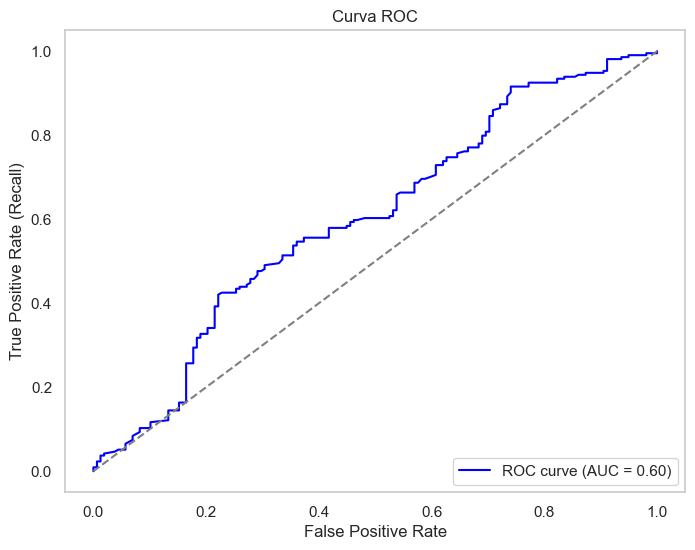

In [261]:
# Mostrar la curva ROC y calcular el area bajo la curva.

# Obtener probabilidades para la clase positiva
y_probs = logreg_lasso.predict_proba(X_test)[:, 1]

# Calcular valores para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular AUC
auc_score = roc_auc_score(y_test, y_probs)

# Graficar curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # línea diagonal para azar
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Pregunta 17 ###
Realizar una interpretación de los resultados obtenidos en las métricas: accuracy y recall (para ambas categorías 0 y 1). ¿Cuál es el valor del area bajo la curva obtenido? ¿Qué conclusión sobre el modelo obtenemos a partir de este valor? ¿Y cual sería la conclusión general del modelo en base a todos los resultados obtenidos?

***Respuesta:***

El modelo presenta una exactitud (accuracy) del 59%, lo que indica que acierta en cerca de seis de cada diez predicciones realizadas sobre el conjunto de validación. Aunque este nivel de precisión es moderado, no resulta especialmente alto, lo que sugiere que el modelo tiene un margen significativo para mejorar.

En cuanto a la sensibilidad o recall, se observa un comportamiento diferenciado según la clase: para la categoría 0, el recall es apenas del 30%, lo que significa que el modelo identifica correctamente solo el 30% de los casos reales de esta clase. Esto evidencia una baja capacidad para detectar adecuadamente dicha categoría. En contraste, para la categoría 1, el recall alcanza el 81%, lo que indica que el modelo es bastante efectivo para reconocer esta clase. Esta disparidad en la capacidad de detección refleja un sesgo hacia la clase 1, y una limitada capacidad para identificar la clase 0, aspecto que podría afectar la utilidad del modelo si ambas categorías son igualmente relevantes.

El área bajo la curva ROC (AUC) es de 0.60, un valor ligeramente superior a 0.5, que correspondería a un clasificador que predice al azar. Esto implica que la capacidad del modelo para discriminar correctamente entre ambas clases es limitada y mejora solo marginalmente frente a un clasificador aleatorio.

Respecto a los coeficientes estimados, se observa que variables como el salario tienen un efecto positivo relevante en la probabilidad de pertenecer a la clase positiva, mientras que la educación y los años de experiencia presentan efectos negativos, aportando información valiosa para entender cómo influyen estas variables en la predicción.

En conclusión, aunque el modelo muestra un desempeño razonable para identificar la clase 1 y captura la influencia de variables importantes, su bajo recall para la clase 0 y un AUC modesto indican que el modelo necesita ser mejorado para lograr un equilibrio adecuado entre ambas categorías y aumentar su capacidad predictiva general.

Cambiamos de tercio y pasamos ahora a trabajar con todo el conjunto de datos completo (incluyendo la variable ***Gender***) ya que vamos a realizar un clustering sobre todo el conjunto para ver qué grupos o segmentos encontramos más representativos en los datos. Empezaremos cargando un fichero nuevo que contiene los mismos datos pero sin la necesidad de tratar o trabajar nulos y outliers. El fichero se llama *Salary.csv*.

El clustering que vamos a realizar sobre estos datos es un clustering jerarquico aglomerativo. Para ello prepararemos los datos categorizando algunas variables según se considere oportuno, agruparemos categorías de variables categóricas si procede, normalizaremos y/o estandarizaremos, codificaremos variables categóricas, etc. Muchos de estos pasos son comunes con los ejercicios anteriores por lo que será sencillo repetir algunos de estos pasos. Otros podrán añadirse en función de lo que el alumno considere teniendo en cuenta el ejercicio de clusterización que vamos a llevar a cabo.

Las siguientes lineas de código deben llevar a cabo estas transformaciones.

Por sencillez a la hora de interpretar resultados, se recomienda trabajar sobre una copia del conjunto de datos original para poder extraer métricas a partir de los datos sin transformar.

In [263]:
data_2 = pd.read_csv('Datos/Salary.csv')
data_2.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0


In [180]:
# Categorización de variables numericas

In [181]:
# Codificación de categóricas

In [182]:
# Normalización / Estandarización

In [183]:
# etc

In [184]:
# ...

A continuación procedemos a definir la función de enlace para el algoritmo jerarquico aglomerativo. Se requiere porbar al menos 2 funciones de enlace y hacer todo el proceso de clusterización completo para dichas funciones. Crear las matrices de distancias basadas en dichas funciones y mostrar los dendogramas de la clusterización, a ser posible indicando con colores selección de clusters.

In [185]:
# Crear las matrices de distancias para lsa funciones de enlace escogidas

In [186]:
# Mostrar los dendogramas

### Pregunta 18 ###
A la vista de los resultados, para cada función de enlace escogida, ¿En cuántos clusters se ha decidido agrupar los datos?

***Respuesta:***

A continuación crear varias columnas nuevas sobre el dataframe original (una por cada función de enlace con que se haya decidido trabajar) y almacenar en ellas para cada registro el número de cluster que le corresponde según la clusterización realizada. Después realizar una serie de agrupaciones y métricas que permitan entender o interpretar la naturaleza de cada cluster.

In [187]:
# Agregar columnas al dataframe original

In [188]:
# Obtener métricas para interpretar los clustering obtenidos

### Pregunta 19 ###
Hacer una interpretación de los resultados para cada función de enlace indicando el sentido que pueda tener cada uno de los clusters.

***Respuesta:***